# Scenario

You have been hired as a Data Analyst for “Gnod”.

“Gnod” is a site that provides recommendations for music, art, literature and products based on collaborative filtering algorithms. Their flagship product is the music recommender, which you can try at www.gnoosic.com. The site asks users to input 3 bands they like, and computes similarity scores with the rest of the users. Then, they recommend to the user bands that users with similar tastes have picked.

“Gnod” is a small company, and its only revenue stream so far are adds in the site. In the future, they would like to explore partnership options with music apps (such as Deezer, Soundcloud or even Apple Music and Spotify). However, for that to be possible, they need to expand and improve their recommendations.

That’s precisely where you come. They have hired you as a Data Analyst, and they expect you to bring a mix of technical expertise and business mindset to the table.

Jane, CTO of Gnod, has sent you an email assigning you with your first task.
Task(s)

    This is an e-mail Jane - CTO of Gnod - sent over your inbox in the first weeks working there.

> Dear xxxxxxxx, We are thrilled to welcome you as a Data Analyst for Gnoosic!
As you know, we are trying to come up with ways to enhance our music recommendations. One of the new features  we’d like to research is to recommend songs (not only bands). We’re also aware of the limitations of our  collaborative filtering algorithms, and would like to give users two new possibilities when searching for recommendations:
> * Songs that are actually similar to the ones they picked from an acoustic point of view.
> * Songs that are popular around the world right now, independently from their tastes.

> Coming up with the perfect song recommender will take us months - no need to stress out too much. In this first week, we want you to explore new data sources for songs. The Internet is full of information and our first step is to acquire it do an initial exploration. Feel free to use APIs or directly scrape the web to collect as much information as possible from popular songs. Eventually, we’ll need to collect data from millions of songs, but we can start with a few hundreds or thousands from each source and see if the collected features are useful.

> Once the data is collected, we want you to create clusters of songs that are similar to each other. The idea is that if a user inputs a song from one group, we’ll prioritize giving them recommendations of songs from that same group.

> On Friday, you will present your work to me and Marek, the CEO and founder. Full disclosure: I need you to be very convincing about this whole song-recommender, as this has been my personal push and the main reason we hired you for!

> Be open minded about this process: we are agile, and that means that we define our products and features on-the-go, while exploring the tools and the data that’s available to us. We’d love you to provide your own vision of the product and the next steps to be taken.

> Lots of luck and strength for this first week with us!

> Jane

# Imports

In [1]:
import json
from IPython.display import Image

import pandas as pd
from tqdm.notebook import tqdm

# Importing spotify API stuff
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import getpass
import time
import random
import requests

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Import my custom modules in the same folder (saved as .py files)
from scrape_billboard import scrape_billboard
# import recommender_mvp


ModuleNotFoundError: No module named 'scrape_billboard'

In [2]:
ls

8.01 activity 2.ipynb
Building an MVP - GNOD.ipynb
European Smart-Cities Ranking.ipynb
Folium Workshop - Mapping.ipynb
Lab - Web Scraping Single Page.ipynb
Unit 8 Project.pdf
Web Scraping - 1.ipynb
Web Scraping - 2.ipynb
Web Scraping Multiple Pages.ipynb
apis-skyscanner.ipynb
data_8.01_activities-master/
data_8.04_activities-master/
data_8.05_activities-master/
data_8.06_activities-master/
developer.spotify client ID.png
gnod MVP - Final.ipynb
lab-api-wrappers-master/
lab-unsupervised-learning-intro-master/
lab-web-scraping-multiple-pages-master/
lab-web-scraping-single-page-master/
lab-working-with-api-master/
recordings/
scraping coding bootcamp list.ipynb
webscraping workshop.ipynb
webscraping_workshop_livecoded (1).ipynb
webscraping_workshop_livecoded.ipynb


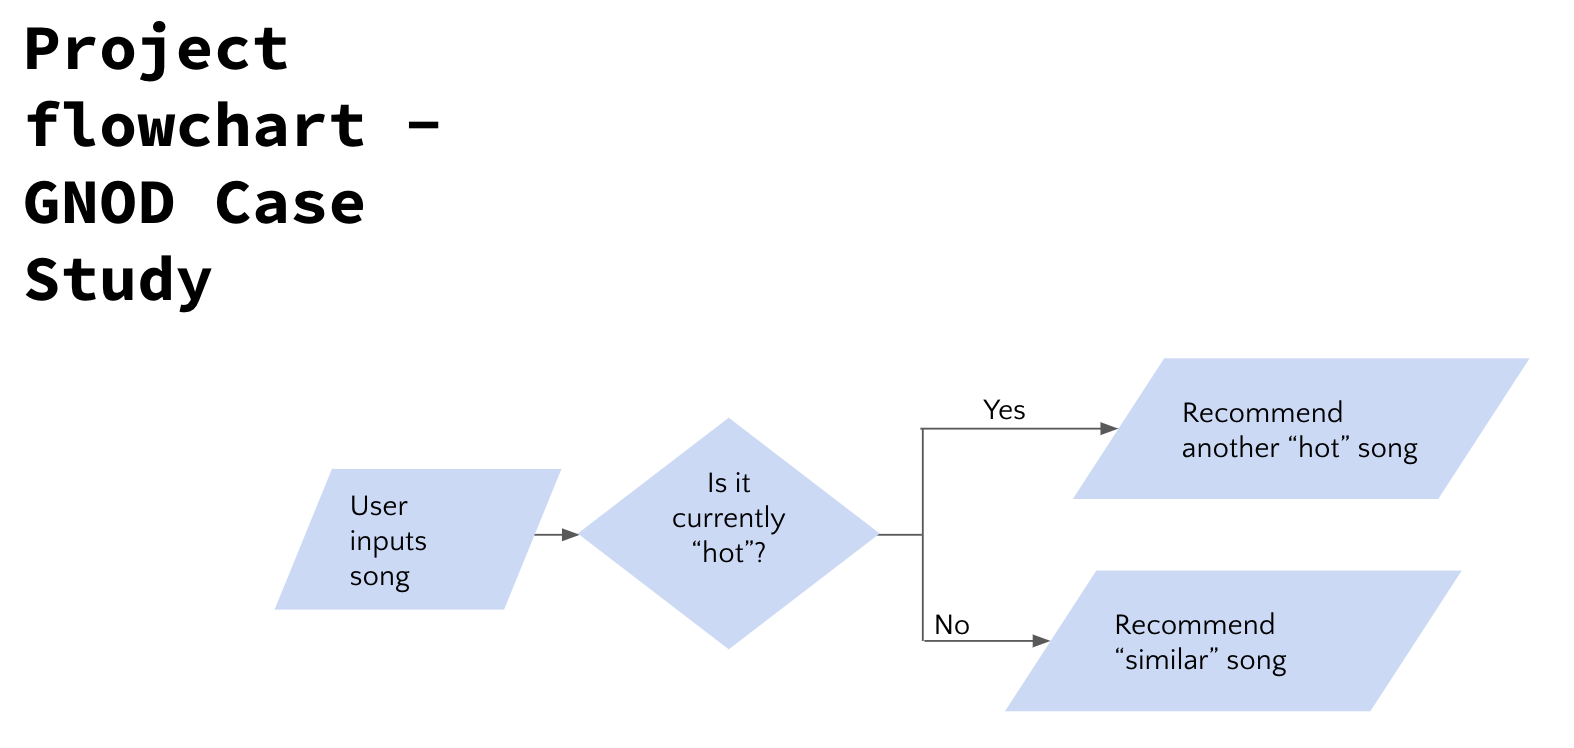

In [2]:
Image("gnod_flow.png", width=800)

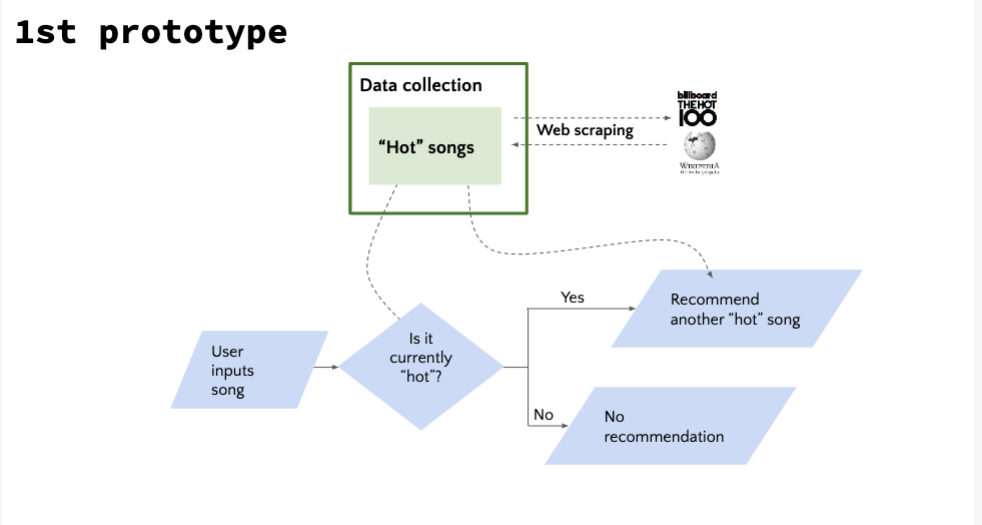

In [3]:
Image("image.png", width=800)

# 1. Scrape the billboard top 100

In [262]:
hot_songs = scrape_billboard(verbose=1)

scraping done in 0.49827300000004016 seconds
dataframe generated in 0.0008669999999710853 seconds


In [263]:
hot_songs

,song,artist,last_week_rank,peak_rank,weeks_on_chart
0,Life Goes On,BTS,-,1,1
1,Mood,24kGoldn Featuring iann dior,1,1,16
2,Dynamite,BTS,14,1,14
3,Positions,Ariana Grande,3,1,5
4,I Hope,Gabby Barrett Featuring Charlie Puth,4,3,48
...,...,...,...,...,...
95,Popstar,DJ Khaled Featuring Drake,83,3,19
96,Bichota,Karol G,-,97,1
97,Happy Does,Kenny Chesney,90,85,6
98,Cover Me Up,Morgan Wallen,-,99,1


# 2. Get songs & their features from Spotify API

User has to provide spotify API credentials

In [264]:
client_id = getpass.getpass(prompt="Spotify client_id: ")
client_secret = getpass.getpass(prompt="Spotify client_secret: ")

#Initialize a SpotiPy instance with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret)
                    )

Spotify client_id: ········
Spotify client_secret: ········


In [265]:
client_id

'64c2853e1fdd437f881a7e4623735b4f'

In [266]:
results = sp.search(q='Blinding lights', limit=50)
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Blinding+lights&type=track&offset=0&limit=50',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
       'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
       'id': '1Xyo4u8uXC1ZmMpatF05PJ',
       'name': 'The Weeknd',
       'type': 'artist',
       'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'}],
     'available_markets': ['AD',
      'AE',
      'AL',
      'AR',
      'AT',
      'AU',
      'BA',
      'BE',
      'BG',
      'BH',
      'BO',
      'BR',
      'BY',
      'CA',
      'CH',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DE',
      'DK',
      'DO',
      'DZ',
      'EC',
      'EE',
      'EG',
      'ES',
      'FI',
      'FR',
      'GB',
      'GR',
      'GT',
      'HK',
      'HN',
      'HR',
      'HU',
      'ID',
      'IE',
      'IL',
      'IN',
 

In [267]:
results.keys()

dict_keys(['tracks'])

In [268]:
# this is the query
results['tracks']['href']

'https://api.spotify.com/v1/search?query=Blinding+lights&type=track&offset=0&limit=50'

In [269]:
#if we want to go back to the prev 50 - shortcut
results["tracks"]["previous"]

In [16]:
results["tracks"]["total"]

1625

In [17]:
results["tracks"]["items"][5].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [18]:
# album
results["tracks"]["items"][5]["album"]

{'album_type': 'single',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/26AHtbjWKiwYzsoGoUZq53'},
   'href': 'https://api.spotify.com/v1/artists/26AHtbjWKiwYzsoGoUZq53',
   'id': '26AHtbjWKiwYzsoGoUZq53',
   'name': 'Pentatonix',
   'type': 'artist',
   'uri': 'spotify:artist:26AHtbjWKiwYzsoGoUZq53'}],
 'available_markets': ['AD',
  'AE',
  'AL',
  'AR',
  'AT',
  'AU',
  'BA',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'BY',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HR',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'KZ',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MD',
  'ME',
  'MK',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'RS',
  'RU',
  'SA',
  'SE',
  'SG',
  'SI',
  'SK'

In [19]:
#and the artist
results["tracks"]["items"][5]["artists"]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/26AHtbjWKiwYzsoGoUZq53'},
  'href': 'https://api.spotify.com/v1/artists/26AHtbjWKiwYzsoGoUZq53',
  'id': '26AHtbjWKiwYzsoGoUZq53',
  'name': 'Pentatonix',
  'type': 'artist',
  'uri': 'spotify:artist:26AHtbjWKiwYzsoGoUZq53'}]

In [20]:
# how popular is it on spotify?
results["tracks"]["items"][0]["popularity"]

# scores between 0 and 100 (100 is most popular)

96

In [21]:
# to get the uri of a song
results["tracks"]["items"][5]["uri"]

'spotify:track:42XfiOCf9wEL8RSSK1SeBz'

In [22]:
#what can we pull out of the api for this track ? 
results["tracks"]["items"][5].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [23]:
#how to query more than one artist at once
artists = ["Katy Perry", "Duffy", "Adele"]

In [24]:
my_3_artists = [sp.search(q=artist, limit=50) for artist in artists]

In [25]:
my_3_artists

[{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Katy+Perry&type=track&offset=0&limit=50',
   'items': [{'album': {'album_type': 'single',
      'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6jJ0s89eD6GaHleKKya26X'},
        'href': 'https://api.spotify.com/v1/artists/6jJ0s89eD6GaHleKKya26X',
        'id': '6jJ0s89eD6GaHleKKya26X',
        'name': 'Katy Perry',
        'type': 'artist',
        'uri': 'spotify:artist:6jJ0s89eD6GaHleKKya26X'}],
      'available_markets': ['AD',
       'AE',
       'AL',
       'AR',
       'AT',
       'AU',
       'BA',
       'BE',
       'BG',
       'BH',
       'BO',
       'BR',
       'BY',
       'CA',
       'CH',
       'CL',
       'CO',
       'CR',
       'CY',
       'CZ',
       'DE',
       'DK',
       'DO',
       'DZ',
       'EC',
       'EE',
       'EG',
       'ES',
       'FI',
       'FR',
       'GB',
       'GR',
       'GT',
       'HK',
       'HN',
       'HR',
       'HU',
       '

In [26]:
my_3_artists[0]["tracks"]["items"][7]["uri"]

'spotify:track:5bcTCxgc7xVfSaMV3RuVke'

In [270]:
#Function to get the artists involved in a song:

def get_artists_from_track(track):
    return [artist["name"] for artist in track["artists"]]

# 2.1. get songs from playlists

We want to have a function (or more), which can create us a dataframe with as many songs as possible together with their audio features (to then later be able to train our model with) if we put in playlists into them. So the idea would be:
* **IN**: A list of playlist URIs
* **OUT**: A dataframe with all the songs in them together with their audio features

As always: We will start making this work for one playlist, and then scale up (making it possible for any playlist)

In [28]:
#read a playlist 

playlist_id = 'spotify:user:spotifycharts:playlist:31ymdYCITDnZRtkKzP3Itp'
results = sp.playlist(playlist_id)
print(json.dumps(results, indent=4))

{
    "collaborative": false,
    "description": "A mix of the best pop songs from 2000 till now, updated weekly! \u2b50New music 2020 - top hits - 2000s hits - best songs ever - greatest hits &#x2F;&#x2F; Contact me at team.popularmusic@gmail.com",
    "external_urls": {
        "spotify": "https://open.spotify.com/playlist/31ymdYCITDnZRtkKzP3Itp"
    },
    "followers": {
        "href": null,
        "total": 56695
    },
    "href": "https://api.spotify.com/v1/playlists/31ymdYCITDnZRtkKzP3Itp?additional_types=track",
    "id": "31ymdYCITDnZRtkKzP3Itp",
    "images": [
        {
            "height": null,
            "url": "https://i.scdn.co/image/ab67706c0000bebbc0716e7b3862c0ca774f9bb8",
            "width": null
        }
    ],
    "name": "Popular Music \ud83c\udf6d 2020 Hits & Best Music of the 2000s",
    "owner": {
        "display_name": "midnightstudios",
        "external_urls": {
            "spotify": "https://open.spotify.com/user/midnightstudios"
        },
        

In [ ]:
playlist = sp.user_playlist(client_id,
                            "spotify:playlist:37i9dQZF1DX4fxf4OrMhXb") 
songs = playlist["tracks"]["items"] 
ids = [] 
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 

In [29]:
df = pd.DataFrame(features)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.567,0.797,0,-10.795,0,0.0401,0.002830,0.876,0.1400,0.0573,125.992,audio_features,5kdo4INdzQh1NaeKX5an5u,spotify:track:5kdo4INdzQh1NaeKX5an5u,https://api.spotify.com/v1/tracks/5kdo4INdzQh1...,https://api.spotify.com/v1/audio-analysis/5kdo...,389060,4
1,0.753,0.591,7,-9.868,1,0.0680,0.001010,0.888,0.1710,0.5400,128.003,audio_features,3tjMLbJjWE3y8SfdyPUgwg,spotify:track:3tjMLbJjWE3y8SfdyPUgwg,https://api.spotify.com/v1/tracks/3tjMLbJjWE3y...,https://api.spotify.com/v1/audio-analysis/3tjM...,301875,4
2,0.790,0.822,6,-10.312,0,0.0379,0.000235,0.931,0.1080,0.0410,128.003,audio_features,0lS9dFaFRWNlYne6AGUCYt,spotify:track:0lS9dFaFRWNlYne6AGUCYt,https://api.spotify.com/v1/tracks/0lS9dFaFRWNl...,https://api.spotify.com/v1/audio-analysis/0lS9...,319005,4
3,0.676,0.820,4,-5.347,0,0.0610,0.001130,0.199,0.1040,0.5530,129.991,audio_features,3V3ijKDFFwPM9ADBAW41XQ,spotify:track:3V3ijKDFFwPM9ADBAW41XQ,https://api.spotify.com/v1/tracks/3V3ijKDFFwPM...,https://api.spotify.com/v1/audio-analysis/3V3i...,144200,4
4,0.765,0.933,7,-7.428,1,0.0546,0.001740,0.783,0.0239,0.4310,125.995,audio_features,46YtEycJJnh6nq7OZ8IFTw,spotify:track:46YtEycJJnh6nq7OZ8IFTw,https://api.spotify.com/v1/tracks/46YtEycJJnh6...,https://api.spotify.com/v1/audio-analysis/46Yt...,234289,4


In [125]:
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify", playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

def create_df_from_tracks(tracks):
    # making sure we only get track who really have an id
    tracks = [track for track in tracks if track_exists(track) and id_exists(track)]
    #tracks = [track for track in tracks if id_exists(track)]
    
    # getting all the ids from the tracks
    ids = [get_id(track) for track in tracks]
    
    # Getting the song features from the song ids
    # Warning: Only 100 tracks here
    
    features = sp.audio_features(ids)
    
    try:
        df = pd.DataFrame({'name': [track['track']['name'] for track in tracks],
                           # a track can have mulitple artists. if so, add them seperated by ","
                           'artists': [", ".join([artist['name'] for artist in track['track']['artists']]) for track in tracks],
                           # 'ids': ids,
                          })
        
        # Creating a dataframe from the features 
        df_features = pd.DataFrame(features)
        
        return pd.concat([df, df_features], axis=1)
    
    except AttributeError:
        return pd.DataFrame(columns=['name',
                                     'artists',
                                     'danceability',
                                     'energy',
                                     'key',
                                     'loudness',
                                     'mode',
                                     'speechiness',
                                     'acousticness',
                                     'instrumentalness',
                                     'liveness',
                                     'valence',
                                     'tempo',
                                     'type',
                                     'id',
                                     'uri',
                                     'track_href',
                                     'analysis_url',
                                     'duration_ms',
                                     'time_signature',
                                    ],
                           )

def get_id(track):
        return track['track']['id']
    
def id_exists(track):
    return bool(get_id(track))

def track_exists(track):
    return track['track']

let's check if these two functions work for **one playlist**

In [31]:
my_tracks = get_playlist_tracks("spotify:playlist:37i9dQZF1DX4fxf4OrMhXb")
create_df_from_tracks(my_tracks)

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Mercury,Sam Goku,0.567,0.797,0,-10.795,0,0.0401,0.002830,0.876000,0.1400,0.0573,125.992,audio_features,5kdo4INdzQh1NaeKX5an5u,spotify:track:5kdo4INdzQh1NaeKX5an5u,https://api.spotify.com/v1/tracks/5kdo4INdzQh1...,https://api.spotify.com/v1/audio-analysis/5kdo...,389060,4
1,All Night Long,Demuja,0.753,0.591,7,-9.868,1,0.0680,0.001010,0.888000,0.1710,0.5400,128.003,audio_features,3tjMLbJjWE3y8SfdyPUgwg,spotify:track:3tjMLbJjWE3y8SfdyPUgwg,https://api.spotify.com/v1/tracks/3tjMLbJjWE3y...,https://api.spotify.com/v1/audio-analysis/3tjM...,301875,4
2,Ego Rave D,Deetron,0.790,0.822,6,-10.312,0,0.0379,0.000235,0.931000,0.1080,0.0410,128.003,audio_features,0lS9dFaFRWNlYne6AGUCYt,spotify:track:0lS9dFaFRWNlYne6AGUCYt,https://api.spotify.com/v1/tracks/0lS9dFaFRWNl...,https://api.spotify.com/v1/audio-analysis/0lS9...,319005,4
3,TASTY,Shygirl,0.676,0.820,4,-5.347,0,0.0610,0.001130,0.199000,0.1040,0.5530,129.991,audio_features,3V3ijKDFFwPM9ADBAW41XQ,spotify:track:3V3ijKDFFwPM9ADBAW41XQ,https://api.spotify.com/v1/tracks/3V3ijKDFFwPM...,https://api.spotify.com/v1/audio-analysis/3V3i...,144200,4
4,My Head,Miane,0.765,0.933,7,-7.428,1,0.0546,0.001740,0.783000,0.0239,0.4310,125.995,audio_features,46YtEycJJnh6nq7OZ8IFTw,spotify:track:46YtEycJJnh6nq7OZ8IFTw,https://api.spotify.com/v1/tracks/46YtEycJJnh6...,https://api.spotify.com/v1/audio-analysis/46Yt...,234289,4
5,Big Bark Manifesto,Eden Burns,0.792,0.688,4,-12.393,0,0.0677,0.002090,0.928000,0.0761,0.3440,131.979,audio_features,1B7FwbxUiGGATlZJHcovvP,spotify:track:1B7FwbxUiGGATlZJHcovvP,https://api.spotify.com/v1/tracks/1B7FwbxUiGGA...,https://api.spotify.com/v1/audio-analysis/1B7F...,378446,4
6,M-type,COMPUTER DATA,0.789,0.668,11,-8.913,1,0.0614,0.007710,0.888000,0.0784,0.4600,131.994,audio_features,0bHco4SUI1EJmxtcRohKIn,spotify:track:0bHco4SUI1EJmxtcRohKIn,https://api.spotify.com/v1/tracks/0bHco4SUI1EJ...,https://api.spotify.com/v1/audio-analysis/0bHc...,524706,4
7,Armaghetton,"Marco Faraone, Greeko",0.885,0.775,6,-7.298,1,0.0459,0.004370,0.000024,0.0171,0.7860,130.007,audio_features,5V55t8Ss6n1zU9ScKrdYwP,spotify:track:5V55t8Ss6n1zU9ScKrdYwP,https://api.spotify.com/v1/tracks/5V55t8Ss6n1z...,https://api.spotify.com/v1/audio-analysis/5V55...,241866,4
8,Chordwalk Empire - Theobald Ringer Remix,"Steve Bug, Theobald Ringer",0.639,0.947,10,-7.899,0,0.0380,0.012500,0.898000,0.4920,0.1510,124.992,audio_features,3QUUdjrDFtbPNVGwJEuMRU,spotify:track:3QUUdjrDFtbPNVGwJEuMRU,https://api.spotify.com/v1/tracks/3QUUdjrDFtbP...,https://api.spotify.com/v1/audio-analysis/3QUU...,420480,4
9,Jmpng,"CAYAM, Maya Jane Coles",0.782,0.697,10,-11.041,1,0.0695,0.117000,0.934000,0.1100,0.2670,135.965,audio_features,76uVXixtaRku87tqrVHuci,spotify:track:76uVXixtaRku87tqrVHuci,https://api.spotify.com/v1/tracks/76uVXixtaRku...,https://api.spotify.com/v1/audio-analysis/76uV...,340752,4


Bueno! We have established that this works for one playlist. What we want though, is making it work for any playlist, and that the resulting dataframe grows while we add more and more songs. So we have to keep the current state of the dataframe saved. What would be cool: If we had some sort of "`SongCollector`" robot, which should have the following capabilities:

* Has the current state of the dataframe stored.
* Needs to be able to scrape a list of playlist URI's, and for every playlist, add the songs & their features to the dataframe
* if we demand the result the scraping/the current dataframe, the robot should give it to us

Fortunately in Python, this can be perfectly done by a `class`

In [32]:
import pandas as pd

# The Class - which is the blueprint of the robot. You can build multiple robots with different 
# attributes from it
class SongCollector:
    
    # the "constructor" method. These things should happen, when our robot is created
    def __init__(self, dataframe=pd.DataFrame()):
        # "self", the "identity" or consciousness of your individual robot.
        # in this case we say that when the user wants to create the robot with a song dataframe already 
        # in its pocket, the user can initialize it with that and it gets added to the robots "identity"
        self.df = dataframe
        
    # one "ability" of the robot
    def collect_songs_from_playlists(self,
                                     playlist_ids,
                                     remove_duplicates=False):
        """
        Takes the dataframe stored in self.df and expands it by the songs 
        provided by the user in the list <playlists>
        
        playlists: A list of spotify playlist URIs as strings
        """
        for playlist_id in tqdm(playlist_ids):
            tracks = get_playlist_tracks(playlist_id)
            try:
                playlist_df = create_df_from_tracks(tracks)
                self.df = pd.concat([self.df, playlist_df], axis=0)
            except (requests.HTTPError, spotipy.client.SpotifyException) as exception:
                # print(exception)
                continue
            
        # the robot should return the resulting dataframe
        return self.df

In [33]:
playlists = ["spotify:playlist:37i9dQZF1DX4fxf4OrMhXb",
            "spotify:playlist:37i9dQZF1DX0wMD4IoQ5aJ",
            "spotify:playlist:37i9dQZF1DXdLEN7aqioXM",
            ]

my_songcollector = SongCollector()
my_songcollector.collect_songs_from_playlists(playlists)

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Mercury,Sam Goku,0.567,0.797,0,-10.795,0,0.0401,0.002830,0.876,0.1400,0.0573,125.992,audio_features,5kdo4INdzQh1NaeKX5an5u,spotify:track:5kdo4INdzQh1NaeKX5an5u,https://api.spotify.com/v1/tracks/5kdo4INdzQh1...,https://api.spotify.com/v1/audio-analysis/5kdo...,389060,4
1,All Night Long,Demuja,0.753,0.591,7,-9.868,1,0.0680,0.001010,0.888,0.1710,0.5400,128.003,audio_features,3tjMLbJjWE3y8SfdyPUgwg,spotify:track:3tjMLbJjWE3y8SfdyPUgwg,https://api.spotify.com/v1/tracks/3tjMLbJjWE3y...,https://api.spotify.com/v1/audio-analysis/3tjM...,301875,4
2,Ego Rave D,Deetron,0.790,0.822,6,-10.312,0,0.0379,0.000235,0.931,0.1080,0.0410,128.003,audio_features,0lS9dFaFRWNlYne6AGUCYt,spotify:track:0lS9dFaFRWNlYne6AGUCYt,https://api.spotify.com/v1/tracks/0lS9dFaFRWNl...,https://api.spotify.com/v1/audio-analysis/0lS9...,319005,4
3,TASTY,Shygirl,0.676,0.820,4,-5.347,0,0.0610,0.001130,0.199,0.1040,0.5530,129.991,audio_features,3V3ijKDFFwPM9ADBAW41XQ,spotify:track:3V3ijKDFFwPM9ADBAW41XQ,https://api.spotify.com/v1/tracks/3V3ijKDFFwPM...,https://api.spotify.com/v1/audio-analysis/3V3i...,144200,4
4,My Head,Miane,0.765,0.933,7,-7.428,1,0.0546,0.001740,0.783,0.0239,0.4310,125.995,audio_features,46YtEycJJnh6nq7OZ8IFTw,spotify:track:46YtEycJJnh6nq7OZ8IFTw,https://api.spotify.com/v1/tracks/46YtEycJJnh6...,https://api.spotify.com/v1/audio-analysis/46Yt...,234289,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,The Escape Ship (From Doomsday Vault Original ...,Jeremy Cullen,0.462,0.324,4,-16.003,0,0.0289,0.443000,0.874,0.1160,0.2170,160.035,audio_features,6csIHkbGlpsDcFXRXiUVQY,spotify:track:6csIHkbGlpsDcFXRXiUVQY,https://api.spotify.com/v1/tracks/6csIHkbGlpsD...,https://api.spotify.com/v1/audio-analysis/6csI...,185542,4
56,Neon Escapism - Edit,Melezz,0.567,0.546,2,-12.263,0,0.0340,0.001310,0.528,0.1310,0.1800,105.032,audio_features,42Xlg8cKifyHQ8sFgaUBmt,spotify:track:42Xlg8cKifyHQ8sFgaUBmt,https://api.spotify.com/v1/tracks/42Xlg8cKifyH...,https://api.spotify.com/v1/audio-analysis/42Xl...,274286,4
57,Patission Street,Keep Shelly In Athens,0.553,0.649,2,-10.236,1,0.0261,0.004530,0.777,0.2770,0.6950,96.992,audio_features,6J7Q5juj1OHA7UdgHbxGht,spotify:track:6J7Q5juj1OHA7UdgHbxGht,https://api.spotify.com/v1/tracks/6J7Q5juj1OHA...,https://api.spotify.com/v1/audio-analysis/6J7Q...,188000,4
58,Inglorious Express,"Biesmans, Vandesande",0.537,0.872,5,-7.173,0,0.0285,0.000635,0.904,0.1380,0.2250,124.992,audio_features,5bOheDMvI3JeFeaxk14HnS,spotify:track:5bOheDMvI3JeFeaxk14HnS,https://api.spotify.com/v1/tracks/5bOheDMvI3Je...,https://api.spotify.com/v1/audio-analysis/5bOh...,430718,4


Works like a charm for more playlists! But how do we get multiple playlist URIs?
Spotify has listed playlists under certain categories (K-Pop, Metal, Punk, Instrumental, Kids & Family). The wrapper can get these categories with

In [34]:
# check the 'country' or the 'locale' keyword in categories() to customize your playlist selection 
categories = sp.categories()

In [35]:
[cat['name'] for cat in categories['categories']['items']]

['Top Lists',
 '2020 Wrapped',
 'At Home',
 'Pop',
 'Mood',
 'Decades',
 'Hip Hop',
 'In the car',
 'Gaming',
 'Wellness',
 'Workout',
 'Chill',
 'Focus',
 'Sleep',
 'Party',
 'Metal',
 'Rock',
 'Dance/Electronic',
 'Cooking & Dining',
 'Jazz']

Splendid! Let's take them all with their ~~URI's~~ ID's (URI's are not stored, but whatever) and build a dictionary out of it

In [36]:
categories_dct = {cat['name']: cat['id'] for cat in categories['categories']['items']}
categories_dct

{'Top Lists': 'toplists',
 '2020 Wrapped': '2020',
 'At Home': 'at_home',
 'Pop': 'pop',
 'Mood': 'mood',
 'Decades': 'decades',
 'Hip Hop': 'hiphop',
 'In the car': 'in_the_car',
 'Gaming': 'gaming',
 'Wellness': 'wellness',
 'Workout': 'workout',
 'Chill': 'chill',
 'Focus': 'focus',
 'Sleep': 'sleep',
 'Party': 'party',
 'Metal': 'metal',
 'Rock': 'rock',
 'Dance/Electronic': 'edm_dance',
 'Cooking & Dining': 'dinner',
 'Jazz': 'jazz'}

Remember, our goal was to get the playlists that can be found under every category. The wrapper has a function for that

In [37]:
# Getting all playlists json's for all the categories
pls = [sp.category_playlists(cat_id) for cat_id in categories_dct.values()]

In [38]:
# now we need to extraxt of every json the playlist ID. Let's do it for one first
[pl['id'] for pl in pls[0]['playlists']['items']]

['37i9dQZF1DXcBWIGoYBM5M',
 '37i9dQZF1DX0XUsuxWHRQd',
 '37i9dQZF1DX4dyzvuaRJ0n',
 '37i9dQZF1DXcF6B6QPhFDv',
 '37i9dQZF1DX4SBhb3fqCJd',
 '37i9dQZF1DX10zKzsJ2jva',
 '37i9dQZF1DX1lVhptIYRda',
 '37i9dQZF1DWZMWLrh2UzwC',
 '37i9dQZF1DWWjGdmeTyeJ6',
 '37i9dQZEVXbMDoHDwVN2tF',
 '37i9dQZEVXbLRQDuF5jeBp',
 '37i9dQZEVXbLiRSasKsNU9',
 '37i9dQZEVXbKuaTI1Z1Afx']

In [39]:
# and for all

playlist_ids = []
for cat_id in categories_dct.values():
    pl_per_categeroy_json = sp.category_playlists(cat_id)['playlists']['items']
    print(pl_per_categeroy_json)
    for pl in pl_per_categeroy_json:
        try:
            id_ = pl['id']
        except TypeError:
            continue
        playlist_ids.append(f"spotify:playlist:{id_}")

[{'collaborative': False, 'description': 'Your daily update of the most played tracks in Spain right now.', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZEVXbNFJfN1Vw8d9'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbNFJfN1Vw8d9', 'id': '37i9dQZEVXbNFJfN1Vw8d9', 'images': [{'height': None, 'url': 'https://charts-images.scdn.co/assets/locale_en/regional/daily/region_es_large.jpg', 'width': None}], 'name': 'Spain Top 50', 'owner': {'display_name': 'spotifycharts', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotifycharts'}, 'href': 'https://api.spotify.com/v1/users/spotifycharts', 'id': 'spotifycharts', 'type': 'user', 'uri': 'spotify:user:spotifycharts'}, 'primary_color': None, 'public': None, 'snapshot_id': 'NjYwMzE2MDAyLDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDY1NmU=', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbNFJfN1Vw8d9/tracks', 'total': 50}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZEV

[{'collaborative': False, 'description': "Get happy with today's dose of feel-good songs!", 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX3rxVfibe1L0'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX3rxVfibe1L0', 'id': '37i9dQZF1DX3rxVfibe1L0', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f00000003aa93fe4e8c2d24fc62556cba', 'width': None}], 'name': 'Mood Booster', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTYwNzAyOTczMCwwMDAwMDAwMGQ0MWQ4Y2Q5OGYwMGIyMDRlOTgwMDk5OGVjZjg0Mjdl', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX3rxVfibe1L0/tracks', 'total': 76}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZF1DX3rxVfibe1L0'}, {'collaborative': False, 'description': 'Feel 

[{'collaborative': False, 'description': 'The tracks that gamers love.', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DWTyiBJ6yEqeu'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWTyiBJ6yEqeu', 'id': '37i9dQZF1DWTyiBJ6yEqeu', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f0000000393e494dfa690515c1dad5885', 'width': None}], 'name': 'Top Gaming Tracks', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTYwNzAyOTc2MCwwMDAwMDAwMGQ0MWQ4Y2Q5OGYwMGIyMDRlOTgwMDk5OGVjZjg0Mjdl', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWTyiBJ6yEqeu/tracks', 'total': 60}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZF1DWTyiBJ6yEqeu'}, {'collaborative': False, 'description': 'Pass the sticks & p

[{'collaborative': False, 'description': 'Kick back to the best new and recent chill tunes.', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX4WYpdgoIcn6'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4WYpdgoIcn6', 'id': '37i9dQZF1DX4WYpdgoIcn6', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f00000003cf8e264c6a92e245402ecb7a', 'width': None}], 'name': 'Chill Hits', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTYwNzAyOTc3NiwwMDAwMDAwMGQ0MWQ4Y2Q5OGYwMGIyMDRlOTgwMDk5OGVjZjg0Mjdl', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4WYpdgoIcn6/tracks', 'total': 130}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZF1DX4WYpdgoIcn6'}, {'collaborative': False, 'description': 'Just

[{'collaborative': False, 'description': '<a href="spotify:genre:edm_dance">Move</a> your feet!', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DXaXB8fQg7xif'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXaXB8fQg7xif', 'id': '37i9dQZF1DXaXB8fQg7xif', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f00000003470dd505fcf08e4693db9b24', 'width': None}], 'name': 'Dance Party', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTYwNzAyOTc2NiwwMDAwMDAwMGQ0MWQ4Y2Q5OGYwMGIyMDRlOTgwMDk5OGVjZjg0Mjdl', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXaXB8fQg7xif/tracks', 'total': 100}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZF1DXaXB8fQg7xif'}, {'collaborative': False, 'description': 

[{'collaborative': False, 'description': 'Rock legends and epic songs that continue to inspire generations.', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DWXRqgorJj26U'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWXRqgorJj26U', 'id': '37i9dQZF1DWXRqgorJj26U', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f00000003519fc8771d90f496501a4da3', 'width': None}], 'name': 'Rock Classics', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTYwMDc5MTM4OSwwMDAwMDA1NzAwMDAwMTc0YjY5YTI1OGMwMDAwMDE3M2ZlNjNkYjRm', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWXRqgorJj26U/tracks', 'total': 145}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZF1DWXRqgorJj26U'}, {'collaborative': False, '

[{'collaborative': False, 'description': 'The best tunes in jazz history. Cover: John Coltrane', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DXbITWG1ZJKYt'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXbITWG1ZJKYt', 'id': '37i9dQZF1DXbITWG1ZJKYt', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f0000000388b40afd9e31d92a818f355d', 'width': None}], 'name': 'Jazz Classics', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTYwNzAyOTc1NywwMDAwMDAwMGQ0MWQ4Y2Q5OGYwMGIyMDRlOTgwMDk5OGVjZjg0Mjdl', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXbITWG1ZJKYt/tracks', 'total': 80}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZF1DXbITWG1ZJKYt'}, {'collaborative': False, 'description': 

In [40]:
len(playlist_ids)

207

In [41]:
playlist_ids

['spotify:playlist:37i9dQZEVXbNFJfN1Vw8d9',
 'spotify:playlist:37i9dQZF1DXaxEKcoCdWHD',
 'spotify:playlist:37i9dQZEVXbMDoHDwVN2tF',
 'spotify:playlist:37i9dQZF1DX8O2z77nfMgH',
 'spotify:playlist:37i9dQZEVXbLiRSasKsNU9',
 'spotify:playlist:37i9dQZEVXbMfVLvbaC3bj',
 'spotify:playlist:37i9dQZF1EM9inaDkJ65ak',
 'spotify:playlist:37i9dQZF1EOgefB1GuKMIU',
 'spotify:playlist:37i9dQZF1EOpljT4KTl0ge',
 'spotify:playlist:37i9dQZF1DXclbYmv5Uve0',
 'spotify:playlist:37i9dQZF1DWX9sh5c3DUg5',
 'spotify:playlist:37i9dQZF1DWXgY89J4Sjdb',
 'spotify:playlist:37i9dQZF1DX7Jl5KP2eZaS',
 'spotify:playlist:37i9dQZF1DX3kG0QdJTt7m',
 'spotify:playlist:37i9dQZF1DWSlG8NYyZ01d',
 'spotify:playlist:37i9dQZF1DX1uZXd7eUqMz',
 'spotify:playlist:37i9dQZF1DWW5ZaB2EutFb',
 'spotify:playlist:37i9dQZF1DWYFbKNOYZlTp',
 'spotify:playlist:37i9dQZF1DWYz61oV0Yc4H',
 'spotify:playlist:37i9dQZF1DX3XHKvhxCIS5',
 'spotify:playlist:37i9dQZF1DX2ApmO385iVi',
 'spotify:playlist:37i9dQZF1DWSPMbB1kcXmo',
 'spotify:playlist:37i9dQZF1DX9b

Great 252 playlists! Let's get the songs out of them. ** taking cover **

In [42]:
my_songcollector = SongCollector()
my_songcollector.collect_songs_from_playlists(playlist_ids)

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=75rGONmoi48LLYBFaGiYsv,2ZcwbSYqc8RfPGMMXTIdb0,2StEq5J2bCq5JiwCKbansz,0wPfUQUkWcguy2iUH0BWOT,5VDnV2q6OrlrPsHsDZtIP1,6UcQPAH459nMfAXAvV9Udc,75QdM3nsnAluOD19G1J4il,55YMj9pA2x7CkC3NmDtBkl,6A10Rn20ulDup3uNuOohUF,32Q7B7BsaUBb8D2zT2Vngb,4WZkUCTbsSB7ivrZhHy9YF,0vbdBx2CsogPetRgEd2iWn,45AwkbYypZWEGFuwQcMiOm,3izrf60gvOUQMOZ2JhuCVj,1pvfRI4ahc13eOvO2rVzol,1pY4lWKYXLGqcSql0CzDuy,6gOR8xTSQWEMfEJa7r52k7,1FG2lH6gxJCX94kOg2Sozp,4WyhOKXtCkNVcgfTBpYaxm,7HfDDnqygZdXqzH33fWZfx,0n1KK4wHT71v40NBhOCbfz,5V28G1ktbqATUy4ioDzJZM,5su53Xdmss3Sh3Fhv9BkUf,7LMn9rFcRyxRSn59jzITh1,2u0bltYG3O7B8LFwkPBdq9,4pDE8vhtcEb90Eq2SvdWyB,1CaOMLZXTQxif7TVD9ieSd,0JlwmGK34Lbe62xPbpsmSb,1xqUV7b5I7gdaINGhSO8CM,1vebX4LzoQVFBMtnFmwEuX,7qAd8DblDg1luQ8qnRJOmh,5An8NQkXTYa5gz8BIWeWk5,5alFLxnNmBmTdNM6Oq0nqD,43bYs8QkPdCdy5esfnmU1T,4zkau5yMAm8DublNrrbShN,3qs3MBsY8x42FrcVqvwF4I,0nFjW7EVhopM2mfMDJjcOq,0M1V6N3LuejYWDTrSPBKfZ,3s8PqUjMSpcJkfPdb2Fucf,1iKW2yrouUd2E3tK4tj8Tu,63QcKVZNY0y

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=41yIvlFgvGwxq8qTqAR7eG,5dH4xnErpUOIDrGySWGkfJ,6xUhre6N6NhELpQaTBo3rP,0v55XuHDYNj4ELPzpRnNo0,3XujDGA7LqWSHNQ0PaE7X0,6CDzDgIUqeDY5g8ujExx2f,3pJQY7UuX0DcE8pgLZhCjf,3WLwkFXJpZ1VpDxAh0DXzz,20wnO4hGXbWvIPDEmED8gM,4Pg6x9W2ziSJh5iym9XRTB,7n3u7RrzdXGVcclBEp9aSa,4sG6J4S2FCuMr3oooYAwFS,6o4lFpp8OAFhBqGQbWyAob,2HQY0sXTrBJCuxqJxbeMWB,0xORFaXxl07BtES8IAJ7OD,1xJ8RjDucztPOKB0ek95tf,0Cgd3CK6D2hhbwmLRvtscH,2nO1DYEg1X5GHi8SSuNJQj,0Qw7qGuXlVBZLcfoQ17yZn,1NeLwFETswx8Fzxl2AFl91,4677jRCDMa05jcA94EQ0hG,2pFPvMME9cynR1dokBTHJJ,7BVwi9cIzSc6tpyxsp47vJ,01OOLvNYxeSttThtUj8Mor,7J4inwHlV4Bf0qhe9xGGpS,1wnFpv1gSsFZeuNlHOX1ch,5ocjpwbvnbO2pnAvEa0b2u,4lRuRtvftdSSUA7hLP7zAr,1W2TYUenzUdOOuATtQIWS2,23X4RjHORKVk75NBCjIusY,0DWEV5NfYKtp0WCUWCGShs,0pdKRp2sUthTPe7RLWpPqQ,0OFIdIaICFAKK6nLM19IvJ,1oSuscBj84xVHVhFZOnMXF,4IAdkeIxiUkTE5a1N1BSHT,4fbvXwMTXPWaFyaMWUm9CR,4NEAoEh4hZF1Tgp1QXrUHC,3jwirfTEc9KfcfWuuzOBVl,25DpvTS4zsmLiVLx8Zv3N0,1TlB3z3e5D8OaqYXQAVIcj,6mtTiVREzK3

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=56kdmEz12GpKkEzxhtHdl7,7lMIJ4EFWRVoAIPDpeGyM3,0X7ELV6fLyjynJ3MexWh4X,4JIYvt01Fibhd7Tgeb9VAq,7l3MaXwZ2QHjJuJ65EEmFd,2Ug4PnkxcwkcL3fhM0B9Xe,2Wy13KxFZT49M05qcT4EJA,4fazGt0v2v2zkzddQOcDZD,0vBpyfpW2lARGh3AZFtWRi,2b81QjZVYfa75vC5niRDac,3SbCWIF7UaSewGfGHkFEI2,4iLL2yVVG19TAJYssbMeBT,3pVwawYlhHg9cLKWpeaN3l,6A4Kuy7JL0Znab3Skgloiv,1CgbwsrNDlFrRuk2ebQ7zr,53gU1D9rFr0OkiJRxc4xYX,0KT6DLAELYSbgfUemzwGPX,6l0LbTF2V77M3LPpcOBmqX,1pKYYY0dkg23sQQXi0Q5zN,2EQA1eRfXvbHKMjSnzUtFD,48gBfTRel9fajeev7tmLpo,7kXmJwrZGIhDaLT9sNo3ut,1EWsVHU4FNAdtN4R8FETag,0ygoI3HcoGScxt879A23Uk,2T42itxS9f1ijygkLOLGOe,36sL3KPEfXIp5KH3tDO7oo,1HYiVTgxERP2llm0yFzVNj,0DiWol3AO6WpXZgp0goxAV,3m4Mp1KfiPawsOjlRlbxN3,4LIbYKwuUBMKmqyZZC7XVg,55nlD6bpoWk0ZwCnn7PTDt,6yeO8fapOJGqL8Hr0Da2l3,3uLSUZEmTY50H6Kw17lpfW,4RQGig0Vhr4GXmqfklCCyK,1o6xUqNNTV2bsWcNoV7zTQ,4xGuK7FsXuZwHCCuNnPzbD,5W3cjX2J3tjhG8zb6u0qHn,4s3CHmungRHAI5ho2edqXb,6mMeuIonqBIcuzCGY5Soqe,1Dj7hbBEco5ZT0DqY7Q2IV,5KOt1QRD9YQ

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7En6m2Yg3J1zAq895bxl78,633YySlXq6qxSdCLFovXdv,7kdnp9XpskkNjGDRlmb8nw,0gBjWQIJ9KcdzT26UzkNqn,0KkNeFOoAKW0NkhaleFeGk,4ViOd3CXbcjX9Y4P6robx4,1GG2rqEQi9OyH1pA8A7qGl,65YJeKP2rTIXKOG34CLvZ5,7vCDAK4DJNr1GHYEG3Ylyp,7CGtdNBijQGEvkZeLU4699,4LGW9dwnuR8a3G1GWcAubi,0N0nIMZDHHv9vCbo1XfN5a,25CNrEEJa7OHKUHjirHfqm,60CvgWVmBjyX1Xx6zD86Me,1bb6MO8FWJ9deNUfLcNybk,5mlBO8SStnPwBA4rikjbuv,0btPgQRq46JCg9Yu3buYWg,5JUL9mfxiKDuBx4H3ZZJAD,6RtdBwIiYavQENjkE6JCba,6Prt67giLGsZm60AjT1dlh,3FVd5GGOeJFvU97JFH7jMH,3HvwuHV9xd0VGi0GncXgoL,10zmtHvaMOZKQrdTsvRJyP,1XBRmzrGn8tZxPYmGb2CXa,7N38FhlGOzPZ8AAnQjAMpU,36LvimjTIyWaVS1CejsRL9,3GNlFyD9YUqLJy2u7W8h2M,0VV45CwyCH6IUkrckbVbNd,3bl88Ud8z2uuG72gS900Yy,5tsQhyjJMfW3SQxvRYbisr,7BCmEyju8nsLtkC7EZS5sR,0s7Qc2ytTasqhqjA9K2U2S,3DSmKmCgRH7vSmdZXBbH4P,70R0IznDPoBZsH6dAXzUOJ,1yUMnQ7kDd874TaPn924Lo,6rvltM3hjcZ9JPlNsZ0v6D,4D0uy3JWqfanEiYfYK6lcq,39hBYtqNwwl7v0gynAWyZj,49WYvbLAlLn9e663fBmCUl,6DkUtEi0XgqV8LmnbDVpna,6OoZfXgh8Y6

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=40T7pP27hzRoZVHofuExIg,0e3Pzob0dTYuUoZTs4iwpr,0Ycl08JD5MBn28OPznygwz,7emdYdVOLn2nIzdFufWUQh,64zhFuKM4TwZ0dcKogeKAN,6pQlRxPMSILxVr7vz3JmGC,2T9BgAmZQT2dLqllKA5UPj,5N5jZgY2X3sfj3HUSjg1Ic,3FoNBTNv03Soj4XDk6FJqH,55RlcgW6hojT3G1wMIovfA,3sAJq6EDW2iNSJnHwLzSqV,30VtdTgyGTBXlPUoEGv6aD,4SO82a7foP5oVqb9cspxd5,1IUe9CBv83sg56rTorIVLp,0JJCzXYsTdoGIKjEadzwke,7aYv33i1kUIlBcTMJPUzFm,6cn3ydXeMViI9FKbvU5yC6,3w6E8ita0ZRqXIyzOhrSSv,4RqQwKxM6mzWEJXl0DNiRn,7Fd5IRxeG2MPpEUjEonnwz,1xVRlpnFBUSWnCT0vsqPvi,7bBS7gjSC4NwZiBwcbYoR7,15Q4tq0gvEelMr40CeBClA,4P7LF3ktiDORMF1coYTf66,3CkHOquzU3g6ekoYiuo5Fo,00KTcw8dXiI7Dyxug4S0lt,6CtgSHDxivSLqi4vjYCUs8,1ONolOLYjM977hgtqKzXmJ,6AzfZ2jIfVNfYPuaBuNnyK,3uGD7qaTWdiIDQZxnKOXr2,2Voua6X82CCcgADavNaBwo,0gRNSWEe6X27ggYGdqDT2r,6cCJLQydZi0hOugxKQPZUZ,6LTIZenP15l2VvkvPF2lFM,7wMtecN31PghxCJGvAwN8n,1skdG0IokRBAJGHylNqMck,1S7ulK4PlPK3KvOWrAq0PG,6HTn6M0mGsN5dCeTd1Ogze,7lpaVjDPjT72Afi7LqXBIx,7hcd0ME4AKAS230Yv1Xa1X,3GJyYi78wUa

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=17KR2xwfXqLDwfibhi7zqZ,5ClSTs7w4GWa6ipki5M8J7,0TQ2Sfay7vPm8RclGBVnGi,3QeEf7TMugwZkmn0hPmXio,4UJie4npIuGkiA8rkndBS6,2JVBtjVMRIctYNfyfH2jFG,7924NRevY7KfgupyhT6Xky,4t9aVhB3mYRqk2H3BgHRS4,7gULomk5ka4EC5EapKWWBj,0nXVUxGyjGsyrIQzHRVesF,02uwXnLbfT68JKAShQ0VTS,1LDAyB24s26kvMt6hXFBks,0kQ3A9cJjKYMVFtNRjqutt,3iLmFedCb8sGWtLbXbY8go,3EKldHvRqW3WI6x03FYVVN,1ME8Thb5mDmBYTI3I5f3uJ,2MN7IMJJf1uanHSUnPG2tc,2ov6YP16sLrlIagJdvgKQe,2o5GJ6ODpzswofGKNI2ZYv,3E5Go2swucT0A6NmqOEChM,1Oryb6TjgqwR97WZc8nuAH,51bkbWYBXyLk7NTM4vWb3Z,2iyVwlrSE1jJOrohg5tv0z,2ll5WUzszERWz9M11Mc6ij,0aBsXZLJDvn0QWfcIqBXq8,2FAtvwUovZe4rx2xFgq19O,22IGm6PYN1THrPe1jFT5u6,3syIqcdNRjbFcWkEMRRT1d,60ujdXHloDnM7Dppefc2b2,4OV56yPi9j1HiMXddhz2js,3uYVpgs8C0PFVV8DD4QCX6,00Dk3QJ4P8EfNxgZRa4eQZ,6rEDjNSmWMZj6sm1MPJ4kv,5LjoyefinBuAQr2Fj2byyM,4QzpJohWGQEZV92hQDM17a,1YVPBX1nfpWOlp6rSrg0C4,6lYO41fg1u7mRLoJYrj8nj,6UU4Zef2KpHMp8Zhz3XqeJ,3yxCWsMkhttpZ9PE5xyUap,19T0zMPlfewq1NL7FVuxii,62ILsIqVAkS

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0OdiAlnSN0k39jarFqVTY8,27uDzcnktuJiP9gAtVc9zS,4y1xXLdfTfb0MAggRGEl6S,6BxiFSFVzviEqe2eIaruLV,6FQklDAiYv2CR7BQOWDRx2,5QhBKPqsnX1uY9fZNaAtZg,5hhHYgKKTxk16lx6lIzFK6,2oTDOIAdsxPTE7yAp4YOcv,4EO7E6OTT3FvYt8ORWLuSH,6lsZdAhA58OOfHj7xtR7h0,3lRgzwd3g1TewI4zjgbh9V,2XKNIzuVL2aOlzGUiPkctF,1di1BEgJYzPvXUuinsYJGP,3fcGGP62sllcNEhuFJVYeC,5VYTKiOnHw4iTrB9pG3yum,0JXXm3RqxU8EKzX4P8M0n3,1yTQ39my3MoNROlFw3RDNy,1no1RWIahrxPdcHH9uRvGk,2uWMj52ImAeeGQFJmVlU5H,0nhu2tp9FXwTu8kUDvS0xO,2ysIFD6lMZtIIqF9KVUwEo,6KEaeg926Ef5bS6jaUDfGk,7qD9lD0dabABT6y3Vw3uVX,7L3KTNiCJcKWsDzKKkbOxC,5b6ARgtnnTzR3d9mcSLAMY,7K0EtHvHcBvXpQf7ujigvl,1mak75GYbqXBt0uglgsjHY,2T1vICHeew9AOIT2RTOZFz,2Yoo0VmPYEloBjMqzXvPRu,3pPyW9Tw16SPFIttCOxYV5,21ppXSj8KOGXWmLu35tKMd,6zblOQOy2mic6Z2tngMAFc,07DWtzwUCrPVR23fLixGdR,1naLa0RD1qIDfaCgpcommF,4fxF8ljwryMZX5c9EKrLFE,2pAP4u8SWwdBn9Pf7Kw7Fd,25TVcud4KotBd7vD5uLXXr,3XzMIbvvXpfFMn2KP8sHAd,6Zcr88YbY3KzbyEXqzSsE1,2y54ZZ7y4Am15YrO8oPPcN,1bOVoJ4rPzc

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0j69d3zENO7ZVjplwetmQp,1fMh032FtBwJDk1iGurH9Y,1LWIWV5GVgX8ajvk5sz1WD,10QxLaeF8vNLLc7O1El6jl,4cYMt6WiUFShfZ6M1A9LPi,3PRF1MTFNTRChwpIEIBCwM,2VpJB1vzL9ZadZ3gF8GQBv,4gnw7ZduO3LMqEcrA1qvyL,5kVRGfWiIOcJwxIjLjesuM,7LMn9rFcRyxRSn59jzITh1,2PMiXyCDik39WiEYvV2wbk,6Drks6dbqYCZ303NPH4c6T,2lYzqfomy4FMguY7Fau75F,7vQIsKOc00SI0iMcBHXTLx,3LJ7dXJzZ2umb3Ccsuq5fT,25CSuITuHOTUSrCx4u72UT,5UNnhT9Ni6tW72zFLADsjy,4oHR6G7xfAqn0fL63QREbF,4H33DONRzLH1dfbCXoFgbq,4WyhOKXtCkNVcgfTBpYaxm,6pQlrYdRh9ok8RH2KjERCR,4YjIG5Py1vSzIJTLcc6ZaE,5ERoUfNfwvNcFCnV0KH9Wu,6bdfM4I40ywx2gOtZjQ7Z6,2CrKPgTinZordfA9xfhjQC,2kqIRUIkaKgxMmuy7hM953,0gopaBSZjH3RrnN35lhwzu,3FPIssWRaxh0YLkYs348hU,4e9lUyz9lB7QRP9OLRpbbw,0MZu1wVuMKAbnAKmO5v1Sw,0GK4ZRf8VCGhS9qtVSNjbj,7u3tmftMEaOYqYE6fUnNmX,4OOKWdVW2Cdivlu6aWPrOE,2LAmMdTuNzuwJGyPgCosdt,3Up1MsHqcxUVgB2iuqFRq2,2dIbIbzsIhjxYGyUELbNjM,6NDt5z8GKIHub37hBQ4x18,4JLdjEPwa80Kfn1tOl0Rdb,6typP3PydlxW5m90XWkxYo,3bqDhyjEa7LmeK8lfmPF9d,4os6s7sgqVG

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2Wq70oxNy3i4KOW175fUs2,3pJnfyKoVePwVmljB6Wun1,4gp5cj5GLbJddPV8Ftphb1,3I3WY0C7AQMe6Z6hMUQqd5,3xE0JN7dBupo1lrr6WvZSl,0N2rkPnpGdWSP9xotxYl2F,5LS7VV5Gp3evv8pjcpTDDu,13MOQ6oQqkrZEDkZOHukCw,0CoSBNNeO8JgayAfLttECk,4Uke8Qv2jsLGq2pKSXjSXO,46yWOqnL99hM5O7OD0Y8Tf,4YxLJVcYXgN1Kxb67BvxEZ,1rIlWy93o6je85WpMpxg6Y,1xvQ1dL7KqGKWxqR0dkSeY,6bt1Qb3CCzQkXkXu3FzEeX,3c0jigaQuhR3R4c6RGX6Ao,5uPgn899inp8HOHHzwUQhG,2lxGdnAk0OiFAZTy5lKyKn,5OO8eMfRfnz1YbfQBww27q,3dS8RW1e5gd5rbSmNjDAPe,3hZJql1Z6TQXZaiT09NCPL,6kwqwIUxDK84yXyfL7jvGf,3U5RTSxDKkhA6rtHEXpI6H,6qeY26kCmlIzpLZVibJU4M,3qOEq8x1ayOUmvcEvzkPux,3I7JFFCxYmFnhU5qrsIpZo,3yhqUuC2ahWeC8PP4mj5Gl,4FFFy9Nm4wUyhc5eMHuQ0z,2Utg4Imeeq5cI6DQ8AupwV,0wHtZIo4VfYdXVKj3xrxWG,3eMTcFDfBkdUxzRDAb8Krs,2irbT1BSYaIEF44PlyKaoM,0dLptfXupd4zsgppQgrvVO,3q257jNovvy9u7dW3BOo4u,1vViUoB7DpXUX10isPj7YL,3iNliE9VdKaPmpUangZfTB,6KZtv7JVe8fKXaIHPj3Gb2,0dHaNi8L1XuvDKxx1V7DFB,2myAatrsAXWSYBCJzphYle,6hNwn4kKfeuDJUDqNFI4s9,4XnsaU3RkUS

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5LS7VV5Gp3evv8pjcpTDDu,3flrE9SDAQj4hP2kKzcHOG,7oj0ajSBpsNjSZAL51fIAM,00iniRV1mt5IS6ep01e2Ts,6MeOCVIU94xMVgr1kTMKRT,3pPVu5GqeYai4ZFNP0j9Wr,1qfYCqVpMcuYLhyThCR7k6,3I7JFFCxYmFnhU5qrsIpZo,07DOQ7ce43Q5ICTdzG8M97,3nZ31x1cLcCRnIRpiOIkPU,3BreWDRhcZRI9stPke1ydd,7oEbJXeTbSSWBNVr0RHRgM,1oGdujU6RNUEl0R9DAFG9Q,3vM5WFlaaxJjCMWsQYLwZI,6j6bxCtwV7aw6cQk9HVTor,6kJsbzODs24YsWxaefoXXH,4vvpzJF121oJbfU2F7yaO0,2rro7SoKEWIrhUl1xcXOIT,4WkE0CevaR93XEmPokzQTp,18gxWtwvPc7BtLfcL52K9i,3JXtJtFkP8gVIl3BM2ajr5,6hNwn4kKfeuDJUDqNFI4s9,3tTr7aNFBaUkH5O7KFB1wS,469gImU7TX8pyIXefZhr0c,1kQFxgqG3KcKErQlvH66lz,2xfXbJK08v7gZb9YvPr0UZ,3iNliE9VdKaPmpUangZfTB,77BoxNybCnK298YxCriS1p,7sj2OB0LdX9mvFm0Cpw9yV,7dNH0Srg1kTobjTUwGnqxc,1yifgXa6NhUmUayr78flWm,6kwqwIUxDK84yXyfL7jvGf,4IMDvjtSlnkDlpH9sRS5Iq,59qHsSncWfBdugXAp2E5AH,0dHaNi8L1XuvDKxx1V7DFB,6OX9snpHRUGnlkSJVGXlR7,7tDHMhO0bJpbkXzMyMIE0b,4zypTg1KZ3HNPcYqfWou6f,11Qo1ZRy2R3aC12G33c210,0NXu6YOaZsTTs8hlDp1Ruh,57dwu0l3c6L

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4TewheY5HBdF1Qv1DVZwcJ,5d9kkOvx3H0GVGB9AtLgvJ,4nAvEP0TxzNPiu710Dl5va,7gIfYC1u2xPLuihb86wdwn,1SMDuZThgauvMckxone4sT,1KeJxSvW6pLU1ieRfQOMca,2GJFu2G9fhaYFrOoX9bejs,58I1vBvQyCzucuxkMl9Pwc,4iXgy9zH7eYSwDuYwb7waL,3DcE75ZUXb6eZPPaaswpJq,2AD8SvaIwYjqYdhCtyK7to,1pvdhULiFFPXxLL3bGHaq7,05yzhEWkmVXiigqWfcNTQS,4JrrAz6CdcawJthf1LdCbE,1cE7h6ByN0dmsb5nVbIdRH,5WpGVggkaT3phJEwrVG3EC,2BoGqeQPudKngGagsPjSJW,7tTGH3yp7nDwUgF0jALOQk,50EMA40T710iKQUlAxkVLe,5ebC5YZw56vrVIkIbkbNvP,4BlM6AO7TOtqxcY9qMHIuc,6IOWaTG6MUfR4824H2XOjJ,4KqnNrqtlD8x4jHbYFsewL,02H2meQsn2tcMNqx6NUZoC,7DXc54rtHRhCIViAy4s5VW,15NLRAn8YZ5XrDXklYkHDZ,3eHSMvfEhVNjavnS3yemOI,1ZIFF4VPWGYA9OG3uYcFgI,6fu7onizuA0GuuzjVaY5BU,7xI0wxBQhYMSWDhkuvbRgM,0Jp7n6FKqGVxtXPMVYtMQr,6IHh011SaCLmvtLvqsbvRG,0Ee9oam0N0ZzxZSN9nogTQ,3MUR1Ku2OcQFcel5ECeR1s,2Y9DRm38cPNvXQn1sJ8Tnw,2WuYYACpbXgn41VaPN3IYs,3CXvekTGvlUimWpLUCJsVi,1acreCE82QFvN32vlcht51,1h0j89VVIoDkhYZCtrC5Ug,4z7XSZvabBr1Q4TFOp6nNL,54UyP0Ap9OY

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2U2i6tqHzKA6kUkYpArz76,3KbkqE5QBmHnBk4tKCri5J,74Ccabhzyt1M79qTQ4Jivz,01Q7qJ90WP59CceunoiD7B,4m2KTXAbTXZXC6Bb3WKJop,3O13orieNSsuObfPFS8BwG,3ixhrF2NqHNOSIFkXPldca,15C6LZS1l1ulhDaUe2TbDO,2ut8jbR0IscCy1BXbLUhbu,24gfzgiimYXIf2gxQxF4cf,2AFka6kv2ZNapN66OoMAcn,3J43NF1eQPqJLS64ZTtIYU,26L2FksD8zRLLcycP2QvfJ,1YxjejV7l4hXl45XU2Lr7D,0e75LMLqDz7IhEGjswPMfJ,7xa0f1u6PD4pVqTLw07hNR,0YuKG1kFgb6vLDiQqmBaM3,4qTmL2c2CRxUkJCHyomsKK,1ggZVPo1igmW8ZnEMKch9d,0P9kqZymGXK95D6TIbccr7,2YXhl6Y5gFdMYUKS3WWUtg,7HgBLJT1daE6jTNJ1bnCPF,5mvw769FihTs6dokvzhosR,6XBqAyN43UglCHM0sWZLS3,1iweP3VnOVNIALXS65rQkw,6HV3zhmqLZ6kL9afSxn2t9,6HIWJ7OCiyShqeix9zAODH,64jtkwpckVDG9StUHwN8Wx,3zhK6zKrLWxdgwtT1Nzu1c,7GUIUopUV2y3PaGx0xUZcc,4JF77DJLXTu8BhRqh3chaF,6GttsqaEPKPJ0JWk75Ssdy,5WG22XDxMdU2dmnJ3CuVhQ,0gJZa23KwVDfghKSGoWoHr,0bhqI2juxlq9NIMN35cCm1,1jAadgLFryVznvw10ArZZL,0A0x0FqKVh1q0y8ueg9eSx,4Tuz3KrZ9TGYGJ9XbM8ukd,6ZaZGu92O4dOVFtSbF7FrU,6gqhC2JByzlDNx6OrUEIfj,5UnPhb3mYd8

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1nIw3ohgilArczHubneGxD,4oFKxRhqn3yggXFRqZPxWU,4sB0hXFEmjZJR09ilZWsQw,79QKj3v2i0pgicq075v7b2,2pINtLVN94MxcLswXwraqr,2YSKHEng7pFl2505eQHdgV,3aate3AQPeo4pexW02G0xC,6qNbi16H71o7SloWlei4f3,1Td7TGT1XtK2ojUjz1mGUV,6Xbdgb8DnGEJ1i7nQaqYtm,4PQkltcPjdiFh2Uvc3Zvhv,0OYkHTpi9sGuyZpCUUvgdv,6IAMJsPzDLUXboa1ns0zfR,0BMPdd6zvJsA3iILOiPJ7z,3aniWcwiiYKHpm3F5TdeKD,0491Np0stXpsreInxyT2W8,2ZqSzSpNFDgaRvjEF2sptc,5LteMwtmnx3IOCihvyO4v0,7H7R2olrhABhlDtx4AVWfI,3dVeJokvFCUkft6nnkvhW1,6rNYo6thW0BX5R3Cnhj3x1,5rMY7jVVaI34Ovbv7Q3I9h,6RNCtXa95S7zfu3zeE5vmT,7pXi77IKwDERnRqObtCbZa,4S6ItHlMWWD6WehNFJIRkk,5MmZ225j5guy5tHWXA26H3,0VYrvrqaidBnwrVJ7H4Ap3,56LUcrcx5QnOJg7FslfwRH,1pXq5WSNCbRvUJ5VnqAjIk,5kDqzfhwhntiCOoJqHKhN5,6QIxMMNHwKgB3y9zH12P36,5age8OCpmjELfACp8IABO9,79rOnFkYiBBlcCzUMc9HQo,0038p5duwZ3euoTDxmizmF,1YSYZWVYTeWhCU9YJEFzSf,0gT2oxuqDAEth0dY4pqDRS,6mfFTYQQviTesc3QixfAaj,13Y0ucbTNhkDx5YelVGEm9,1gW20KHeyiVRrLUkbu39eo,2ELzYZUmfviZaG7qAsg73J,2vE5gGxZk5f

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6NIxukSQvEn1W5ByybS2Ku,0c2MVfLpCAQOts74o45rOb,3vj6LLFaqBx3WMfpudzYCe,34cHyqj29KUXEOyptQk84A,2H8J7EH28wguNsQjJhqR5w,1uynHp00rmUgQVAClf5BZf,5DYvN55PZBw2EwWiLUFcS4,0vKOzcOZXzyxvowNPXrYBo,27rwFWkrEWwUVWqvIM2g6u,48h97Zj2vrG00r6ViogmMU,6RMMT7OhO1eQwWxBwR9k2C,7oHj5oYIa4q1SC0hotiCm6,47XrdzCUwyLdYsDct2QzRB,1PVtnDYRT9UtDBwSETXPlz,46PbH6KK9wcmY3WC84kg4X,1QzgX707AutnOMl2K9Z4nR,3lHyDGxsqpx9QqlkLQAOD1,3UY2OHvcs1uuzOpg6War6o,6PN32o4Kr9Pv92gZEyph9Z,5wq4p3mLcOKCUlY3AIThJh,5RqiqhgtM3tPKdnaPx9ULj,4DJGYEjN2J8AkN6k3qYAJb,1lcCtViHVQmDjHmWBigaa1,40l3dp5akAfaFurpJ5DFW3,2K0MI5bhVyQwPEh9W437fq,312o4lyfQG4RbMs1BX7gCB,1vnFSBQ0uJP5MyFFJMYzuk,16V9Zy8DOiwVVLDPfZ7msG,49b0o5n2YsqATs4nMjx9oc,0Fs17p60k5SlSpMUuBtos8,3yV6YCrIFR10IcXxa5feUF,1x8ZWpkK7YpRhhIauJYBgH,7eIAIFYlEAG7niMzn8QJPD,49WVSxDWNBq0JN2DnT1901,6lCqNxkI4fJ8GoGYDoyPqG,3LQKRLAEosrZP2AbrsmRCP,7hA5J45cXzpKG28B22245v,5w0GiMFANbG1Woz2a5Tk1g,0m7O3ByK0WvF9khu8QOzYE,5X6KUTAjIkHb8bUBLGbuNv,3GQMGr5XsWU

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5ghIJDpPoe3CfHMGu71E6T,2IZZqH4K02UIYg5EohpNHF,3d9DChrdc6BOeFsbrZ3Is0,59WN2psjkt1tyaxjspN8fp,5wj4E6IsrVtn8IBJQOd0Cl,1hKdDCpiI9mqz1jVHRKG0E,4P5KoWXOxwuobLmHXLMobV,5yEPxDjbbzUzyauGtnmVEC,2EoOZnxNgtmZaD8uUmz2nD,1FTSo4v6BOZH9QxKc3MbVM,4d9RTWdrFLVAGhdzvqxkwn,5QLHGv0DfpeXLNFo7SFEy1,2TAQ9YGehOKWDqDak5DuXc,7yCPwWs66K8Ba5lFuU2bcx,3HfB5hBU0dmBt8T0iCmH42,5PntSbMHC1ud6Vvl8x56qd,6urCAbunOQI4bLhmGpX7iS,1Dr1fXbc2IxaK1Mu8P8Khz,1FkoVC85Ds3mFoK0fVqEqP,5jafMI8FLibnjkYTZ33m0c,7nnWIPM5hwE3DaUBkvOIpy,62nQ8UZVqR2RMvkJHkcO2o,4YPhn26bIFm2KUkL1VLzQG,0NJC0FDCODpPUntRTTQq97,7lksFyVBmmkYBTVQcxnvC3,0uppYCG86ajpV2hSR3dJJ0,3YRCqOhFifThpSRFJ1VWFM,3LRJbFT9rKoKv4aW7PuBJC,39tLc4Xp58Lu4KcWHggeE2,45Ia1U4KtIjAPPU7Wv1Sea,2lXHg7BtTNoP39AezyCSfL,1HZ3cUZUw5htSFmah1V8Ko,7CVYxHq1L0Z4G84jTDS6Jl,0Puj4YlTm6xNzDDADXHMI9,1Z5LCXu5Ca3sHAy6OdUrBT,5G0vAvojJAb8np3INdsISs,2V4Bc2I962j7acQj1N0PiQ,6txWz9UapYHVxEd7dDIHXT,05NYcsjJwOYq4jIiKPVj9p,6mfkHv00I6jhHIn7EWHJ2N,6cJqlSO19vs

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=17KR2xwfXqLDwfibhi7zqZ,5ClSTs7w4GWa6ipki5M8J7,0TQ2Sfay7vPm8RclGBVnGi,3QeEf7TMugwZkmn0hPmXio,4UJie4npIuGkiA8rkndBS6,2JVBtjVMRIctYNfyfH2jFG,7924NRevY7KfgupyhT6Xky,4t9aVhB3mYRqk2H3BgHRS4,7gULomk5ka4EC5EapKWWBj,0nXVUxGyjGsyrIQzHRVesF,02uwXnLbfT68JKAShQ0VTS,1LDAyB24s26kvMt6hXFBks,0kQ3A9cJjKYMVFtNRjqutt,3iLmFedCb8sGWtLbXbY8go,3EKldHvRqW3WI6x03FYVVN,1ME8Thb5mDmBYTI3I5f3uJ,2MN7IMJJf1uanHSUnPG2tc,2ov6YP16sLrlIagJdvgKQe,2o5GJ6ODpzswofGKNI2ZYv,3E5Go2swucT0A6NmqOEChM,1Oryb6TjgqwR97WZc8nuAH,51bkbWYBXyLk7NTM4vWb3Z,2iyVwlrSE1jJOrohg5tv0z,2ll5WUzszERWz9M11Mc6ij,0aBsXZLJDvn0QWfcIqBXq8,2FAtvwUovZe4rx2xFgq19O,22IGm6PYN1THrPe1jFT5u6,3syIqcdNRjbFcWkEMRRT1d,60ujdXHloDnM7Dppefc2b2,4OV56yPi9j1HiMXddhz2js,3uYVpgs8C0PFVV8DD4QCX6,00Dk3QJ4P8EfNxgZRa4eQZ,6rEDjNSmWMZj6sm1MPJ4kv,5LjoyefinBuAQr2Fj2byyM,4QzpJohWGQEZV92hQDM17a,1YVPBX1nfpWOlp6rSrg0C4,6lYO41fg1u7mRLoJYrj8nj,6UU4Zef2KpHMp8Zhz3XqeJ,3yxCWsMkhttpZ9PE5xyUap,19T0zMPlfewq1NL7FVuxii,62ILsIqVAkS

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=56kdmEz12GpKkEzxhtHdl7,7lMIJ4EFWRVoAIPDpeGyM3,0X7ELV6fLyjynJ3MexWh4X,4JIYvt01Fibhd7Tgeb9VAq,7l3MaXwZ2QHjJuJ65EEmFd,2Ug4PnkxcwkcL3fhM0B9Xe,2Wy13KxFZT49M05qcT4EJA,4fazGt0v2v2zkzddQOcDZD,0vBpyfpW2lARGh3AZFtWRi,2b81QjZVYfa75vC5niRDac,3SbCWIF7UaSewGfGHkFEI2,4iLL2yVVG19TAJYssbMeBT,3pVwawYlhHg9cLKWpeaN3l,6A4Kuy7JL0Znab3Skgloiv,1CgbwsrNDlFrRuk2ebQ7zr,53gU1D9rFr0OkiJRxc4xYX,0KT6DLAELYSbgfUemzwGPX,6l0LbTF2V77M3LPpcOBmqX,1pKYYY0dkg23sQQXi0Q5zN,2EQA1eRfXvbHKMjSnzUtFD,48gBfTRel9fajeev7tmLpo,7kXmJwrZGIhDaLT9sNo3ut,1EWsVHU4FNAdtN4R8FETag,0ygoI3HcoGScxt879A23Uk,2T42itxS9f1ijygkLOLGOe,36sL3KPEfXIp5KH3tDO7oo,1HYiVTgxERP2llm0yFzVNj,0DiWol3AO6WpXZgp0goxAV,3m4Mp1KfiPawsOjlRlbxN3,4LIbYKwuUBMKmqyZZC7XVg,55nlD6bpoWk0ZwCnn7PTDt,6yeO8fapOJGqL8Hr0Da2l3,3uLSUZEmTY50H6Kw17lpfW,4RQGig0Vhr4GXmqfklCCyK,1o6xUqNNTV2bsWcNoV7zTQ,4xGuK7FsXuZwHCCuNnPzbD,5W3cjX2J3tjhG8zb6u0qHn,4s3CHmungRHAI5ho2edqXb,6mMeuIonqBIcuzCGY5Soqe,1Dj7hbBEco5ZT0DqY7Q2IV,5KOt1QRD9YQ

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3JsmrruMp8AWcbEZ4342JY,4xZax8srPgsXV2mpMerqEk,3ijMfK5xwJTDdeyJp72mPM,2rUsJXt4NeeDiIU6sBvrxo,7d5wXNOlF7TGZayKu0h12F,02dPa4nXABwnFzjZosKxsk,5VDnV2q6OrlrPsHsDZtIP1,320nFPk23PxsRoEFeOMNgy,22y2mqIBERBviZF0fa86iw,0O5dd0a3OoC5QhLwAcUSTn,2lLq1Ah7lTA4P3SA2OPAsi,5G8T8JFhuGVG9aOPLaIzIx,7bTN2ZFftsLk8TELDOxKqB,0cWDechbo7Tmf6nk0QRLhI,5emTyRnoMTLc9G44RR6XIE,6DrbW5cFbwb1JHcdAXO8tD,1w8DxFHDDInmn5TovLKKrW,1EHgCTp5LuW5Rlt7IruwCf,039VxfSo5FErqE65169VZL,5VL2XTEiThJ4auCKBZ44R8,06O0jpmcM916FT7I4L8O5Z,1dK5t2UGFfEAY7vBDb75Gz,1EpF7SUZOEdYXAJF6QC43Z,4muUXLYIrhCXtFsPogjIcn,3ydFRJUABULlXklU1M24TV,0KJAVizRhvcLNd2f8QxhdI,2sEZIvBLWMPljdtrWakv9D,1dQtt3K8GyPmH7ZD1LJ2ox,10bmUjdCwAcLNMaFs6BLNO,5V55t8Ss6n1zU9ScKrdYwP,7MtJ0dU4m3F6JQG9qdyaPk,2cE7I6BIi2GaVi5y0YYd5F,0yjxW8s0Uuk9uKi0Nh9B7T,4kd8NJrrfzzPvarSre2yAu,7zBFSexzY0VEmmeBmrq3R9,0jsc7t9YMrFxeLWh0w7mKb,64NGjHW1w5Kl42xEKdqi6o,63lOP9C3UVMbKub3v3ZgaO,1pVzZpOwOi4MSNv5vfG1u8,6pKeuJDicz6NTYxXLOyxQG,13rtgTDK9w1

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=06O0jpmcM916FT7I4L8O5Z,2WlQndCclH7hhLMu6Q1rIM,2Rr1INov0ckj7bLTsk9LV1,3CC7fyeynJ2RVDUlUDPNXR,0cWDechbo7Tmf6nk0QRLhI,5SEvxpu5ImOFOcXyeM8fbx,1EpF7SUZOEdYXAJF6QC43Z,7d5wXNOlF7TGZayKu0h12F,7kxnqBmbFilmSlYdDB6aBz,1SEBehSYYCuADY6kf3CHlP,0tRBq8hQKbox13zTypuYqM,0ieEZjHQO5eq9Uad7opItK,06nCnkVALuvvNcBwVRNTUS,0yBR3GSDyWxLWEYQ5sx8pW,21HTLTRVcgap71pYxB3Few,0PGpWcKIlayTwPdz6Qstol,0mSxHkAKB6JR8Y3IX20H3n,0O5dd0a3OoC5QhLwAcUSTn,4Lhcv4HGEIqRv7lCCzfd1L,7KxFCQHFflx0ZlY9SPT5nW,26wmPj5lkwKMRrQICLNI1a,4IJa80QZ60jY7uh1hVOooS,11s8gbi7pqmvuREruilbJP,7M0CEpWtTO8XqMz1xPq8YK,6cQdHu5dZZzIyIjAewqyvT,6JZOPRUWuoi37w55DQN4DU,0Y5IZuawYGfvmmLwRz1YW2,6NV3Ww3Y385zRD4hW2WRz5,5BnZnclZYPTtpBtKVfnKR4,6utv1o8IWxIStgaoJKNkQv,1DkuDqLlR1l1mmKhxhEt4u,5JgW8g5qxWTEFzg50PiUqv,6mIce4eaRg6UOFHABNX2xL,0C7DYgQlDZgC2LmKi4zXQ8,7DG8RuFvCSD345gfIejYIV,77IHeZKI06rCd3c5irieg7,1cvm7CXVnjgAi2AwJ33IAB,3W09VqxOJ4CcClolPt8kcQ,2lK40LtW4w2I82UhXR9qxn,0kJ67B4mMcetMm2mdg1rEz,26FS57Bf3DJ

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,0
0,DÁKITI,"Bad Bunny, Jhay Cortez",0.731,0.5730,4.0,-10.059,0.0,0.0544,0.4010,0.000052,...,0.1450,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090.0,4.0,NaN
1,LA NOCHE DE ANOCHE,"Bad Bunny, ROSALÍA",0.856,0.6180,7.0,-4.892,1.0,0.2860,0.0303,0.000000,...,0.3910,81.993,audio_features,2XIc1pqjXV3Cr2BQUGNBck,spotify:track:2XIc1pqjXV3Cr2BQUGNBck,https://api.spotify.com/v1/tracks/2XIc1pqjXV3C...,https://api.spotify.com/v1/audio-analysis/2XIc...,203201.0,4.0,NaN
2,Tú Me Dejaste De Querer (feat. Niño de Elche &...,"C. Tangana, Niño de Elche, La Húngara",0.812,0.7470,4.0,-4.611,0.0,0.1500,0.3100,0.004120,...,0.4880,168.025,audio_features,0XinBYhf1X3kdvKQHOX971,spotify:track:0XinBYhf1X3kdvKQHOX971,https://api.spotify.com/v1/tracks/0XinBYhf1X3k...,https://api.spotify.com/v1/audio-analysis/0Xin...,198500.0,4.0,NaN
3,YO VISTO ASÍ,Bad Bunny,0.688,0.8810,7.0,-4.889,0.0,0.0474,0.0947,0.000000,...,0.6770,123.013,audio_features,5fROvzNghPid8mbKNDYvpJ,spotify:track:5fROvzNghPid8mbKNDYvpJ,https://api.spotify.com/v1/tracks/5fROvzNghPid...,https://api.spotify.com/v1/audio-analysis/5fRO...,191526.0,4.0,NaN
4,BICHOTA,KAROL G,0.863,0.6660,1.0,-4.158,0.0,0.1520,0.2120,0.000493,...,0.8380,163.908,audio_features,7vrJn5hDSXRmdXoR30KgF1,spotify:track:7vrJn5hDSXRmdXoR30KgF1,https://api.spotify.com/v1/tracks/7vrJn5hDSXRm...,https://api.spotify.com/v1/audio-analysis/7vrJ...,178947.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,"Nocturne No. 20 in C-sharp minor, Op. posthume","Frédéric Chopin, Jacques Loussier",0.485,0.1350,6.0,-18.958,0.0,0.0357,0.9910,0.907000,...,0.2100,117.079,audio_features,7btkqjF0Jw2DopaH6wvgvD,spotify:track:7btkqjF0Jw2DopaH6wvgvD,https://api.spotify.com/v1/tracks/7btkqjF0Jw2D...,https://api.spotify.com/v1/audio-analysis/7btk...,116743.0,3.0,NaN
50,"Beethoven's Piano Sonata No. 8, Pathetique",Hiromi,0.548,0.0955,1.0,-22.531,1.0,0.0368,0.7410,0.930000,...,0.0594,129.332,audio_features,7hdbfMdjsdclkZONmT7lD6,spotify:track:7hdbfMdjsdclkZONmT7lD6,https://api.spotify.com/v1/tracks/7hdbfMdjsdcl...,https://api.spotify.com/v1/audio-analysis/7hdb...,313027.0,4.0,NaN
51,Boléro,Trio X of Sweden,0.553,0.3540,0.0,-15.213,1.0,0.0433,0.7570,0.881000,...,0.6820,79.314,audio_features,0okBlGJdxmDos1f6H4PyRq,spotify:track:0okBlGJdxmDos1f6H4PyRq,https://api.spotify.com/v1/tracks/0okBlGJdxmDo...,https://api.spotify.com/v1/audio-analysis/0okB...,431787.0,3.0,NaN
52,First Gymnopedie,Yusef Lateef,0.449,0.3600,7.0,-17.882,1.0,0.2100,0.9920,0.888000,...,0.1930,78.916,audio_features,6A5DjTiYSkelNb2QuEV4vt,spotify:track:6A5DjTiYSkelNb2QuEV4vt,https://api.spotify.com/v1/tracks/6A5DjTiYSkel...,https://api.spotify.com/v1/audio-analysis/6A5D...,207440.0,3.0,NaN


In [43]:
my_songcollector.df.to_pickle("sptfy_13ksongs.pkl")

Quickly! Pickle the result!

In [44]:
ls

'Create your song collection - Lab solution.ipynb'   __pycache__/
 gnod_flow.png                                       recommender_mvp.py
 gnod_main.ipynb                                     scrape_billboard.py
 image.png                                           sptfy_13ksongs.pkl
 prototype_test.py


# 3. Machine Learning

Finally! But first... duh...

## 3.1. Data cleaning

In [95]:
song_df = pd.read_pickle("sptfy_13ksongs.pkl")

In [96]:
song_df.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,0
0,DÁKITI,"Bad Bunny, Jhay Cortez",0.731,0.573,4.0,-10.059,0.0,0.0544,0.4010,0.000052,...,0.145,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090.0,4.0,NaN
1,LA NOCHE DE ANOCHE,"Bad Bunny, ROSALÍA",0.856,0.618,7.0,-4.892,1.0,0.2860,0.0303,0.000000,...,0.391,81.993,audio_features,2XIc1pqjXV3Cr2BQUGNBck,spotify:track:2XIc1pqjXV3Cr2BQUGNBck,https://api.spotify.com/v1/tracks/2XIc1pqjXV3C...,https://api.spotify.com/v1/audio-analysis/2XIc...,203201.0,4.0,NaN
2,Tú Me Dejaste De Querer (feat. Niño de Elche &...,"C. Tangana, Niño de Elche, La Húngara",0.812,0.747,4.0,-4.611,0.0,0.1500,0.3100,0.004120,...,0.488,168.025,audio_features,0XinBYhf1X3kdvKQHOX971,spotify:track:0XinBYhf1X3kdvKQHOX971,https://api.spotify.com/v1/tracks/0XinBYhf1X3k...,https://api.spotify.com/v1/audio-analysis/0Xin...,198500.0,4.0,NaN
3,YO VISTO ASÍ,Bad Bunny,0.688,0.881,7.0,-4.889,0.0,0.0474,0.0947,0.000000,...,0.677,123.013,audio_features,5fROvzNghPid8mbKNDYvpJ,spotify:track:5fROvzNghPid8mbKNDYvpJ,https://api.spotify.com/v1/tracks/5fROvzNghPid...,https://api.spotify.com/v1/audio-analysis/5fRO...,191526.0,4.0,NaN
4,BICHOTA,KAROL G,0.863,0.666,1.0,-4.158,0.0,0.1520,0.2120,0.000493,...,0.838,163.908,audio_features,7vrJn5hDSXRmdXoR30KgF1,spotify:track:7vrJn5hDSXRmdXoR30KgF1,https://api.spotify.com/v1/tracks/7vrJn5hDSXRm...,https://api.spotify.com/v1/audio-analysis/7vrJ...,178947.0,4.0,NaN


Let's first drop the duplicates, based on the `id` column

In [97]:
song_df = song_df.drop_duplicates(subset=['id'])

In [98]:
song_df.isna().sum()

name                   1
artists                1
danceability           1
energy                 1
key                    1
loudness               1
mode                   1
speechiness            1
acousticness           1
instrumentalness       1
liveness               1
valence                1
tempo                  1
type                   1
id                     1
uri                    1
track_href             1
analysis_url           1
duration_ms            1
time_signature         1
0                   8879
dtype: int64

In [99]:
song_df = song_df.drop(columns=[0])

In [100]:
# drop every row that contains any nan's
song_df = song_df.dropna(how='any',axis=0)

In [101]:
song_df_numeric = song_df.select_dtypes(['number'])

In [102]:
song_df_nonnumeric = song_df.drop(columns=song_df_numeric.columns)

<Figure size 576x576 with 0 Axes>

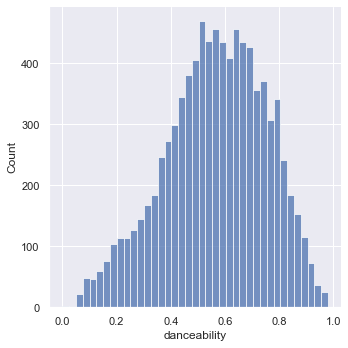

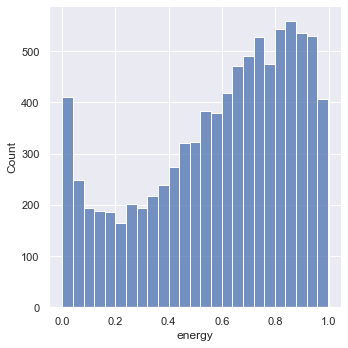

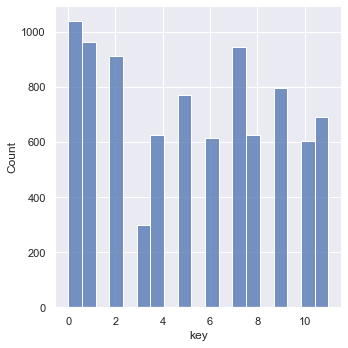

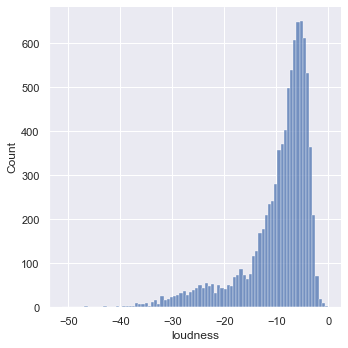

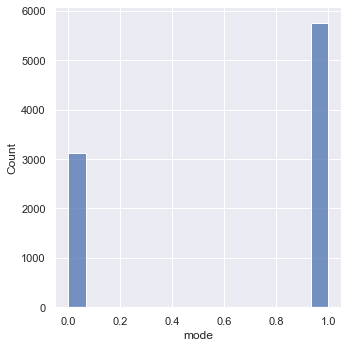

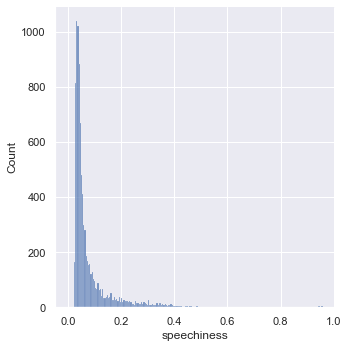

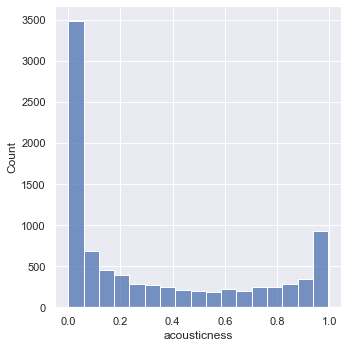

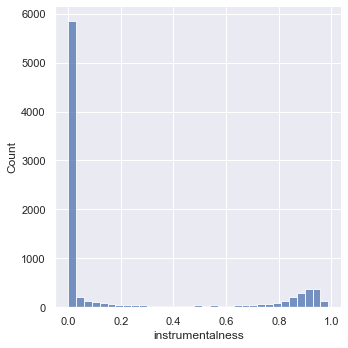

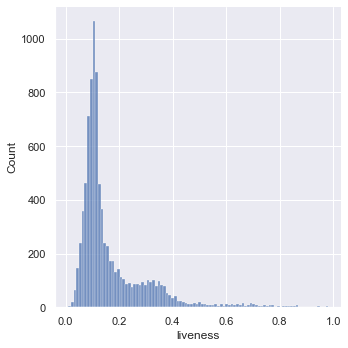

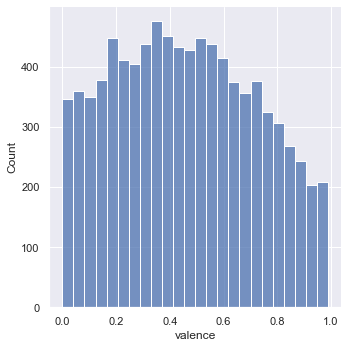

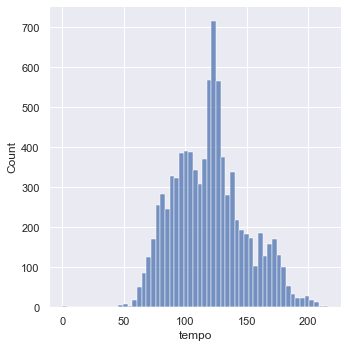

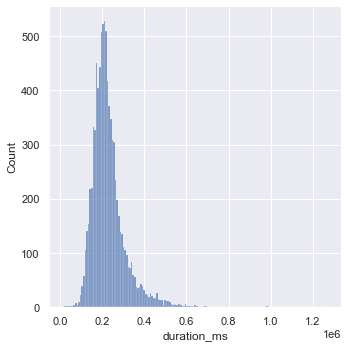

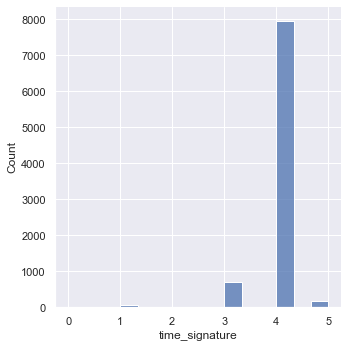

In [48]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(8,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.displot(df[col])
        
    plt.show()
    
df_hist(song_df_numeric)

Let's check the correlation heatmap

<AxesSubplot:>

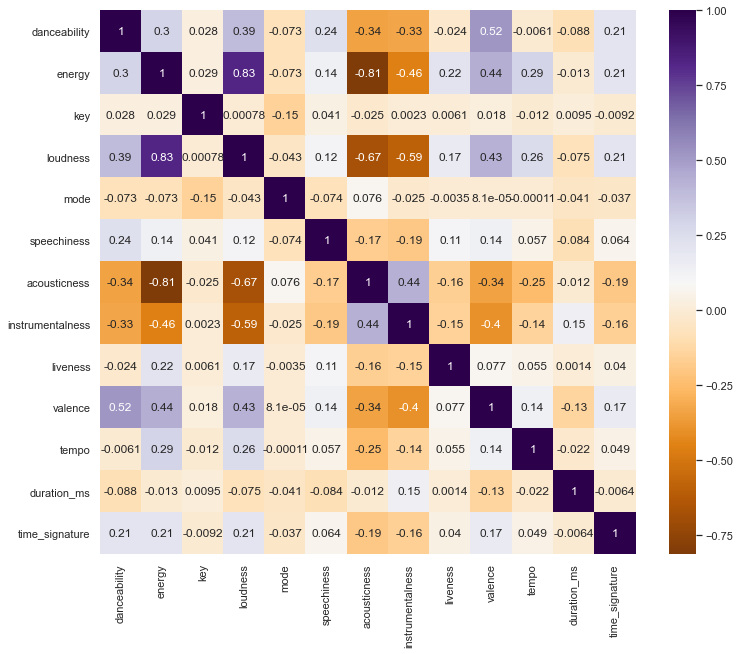

In [103]:
corr = song_df_numeric.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            ax=ax,
            cmap='PuOr'
           )

We can maybe drop
* either `acousticness` or `energy`
* either `loudness` or `energy`

or at least 2 of these 3

## 3.2. Building the model

In [ ]:
X = song_df_numeric

Applying the scaler here is very important since K-Means applys a distance metric.

In [104]:
X_prep = StandardScaler().fit_transform(X)

In [105]:
df_cluster = pd.DataFrame(X_prep)

Initialize the model. Let's start with 8 clusters and a fixed random state

In [106]:
kmeans = KMeans(n_clusters=8, random_state=17)
kmeans.fit(X_prep)

KMeans(random_state=17)

Performance metric of k_means: `intertia`.

In [115]:
kmeans.inertia_

62896.472375101745

In [107]:
# Predicting / assigning the clusters
clusters = kmeans.predict(X_prep)

In [108]:
# show the count of clusters 1, 2, 3 ... 8
pd.DataFrame(pd.Series(clusters).value_counts().sort_index(),
            columns=['count'],
            )

,count
0,603
1,2574
2,1743
3,592
4,1231
5,829
6,833
7,473


In [109]:
X_df = pd.DataFrame(X)
X_df['cluster']=clusters

In [110]:
X_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.731,0.5730,4.0,-10.059,0.0,0.0544,0.4010,0.000052,0.1130,0.1450,109.928,205090.0,4.0,2
1,0.856,0.6180,7.0,-4.892,1.0,0.2860,0.0303,0.000000,0.0866,0.3910,81.993,203201.0,4.0,0
2,0.812,0.7470,4.0,-4.611,0.0,0.1500,0.3100,0.004120,0.1000,0.4880,168.025,198500.0,4.0,2
3,0.688,0.8810,7.0,-4.889,0.0,0.0474,0.0947,0.000000,0.0804,0.6770,123.013,191526.0,4.0,2
4,0.863,0.6660,1.0,-4.158,0.0,0.1520,0.2120,0.000493,0.1030,0.8380,163.908,178947.0,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.485,0.1350,6.0,-18.958,0.0,0.0357,0.9910,0.907000,0.1720,0.2100,117.079,116743.0,3.0,7
50,0.548,0.0955,1.0,-22.531,1.0,0.0368,0.7410,0.930000,0.1120,0.0594,129.332,313027.0,4.0,6
51,0.553,0.3540,0.0,-15.213,1.0,0.0433,0.7570,0.881000,0.1120,0.6820,79.314,431787.0,3.0,3
52,0.449,0.3600,7.0,-17.882,1.0,0.2100,0.9920,0.888000,0.1570,0.1930,78.916,207440.0,3.0,7


re-concatenate cluster dataframe with nonnumeric columns

In [114]:
df_songs_clustered = pd.concat([song_df_nonnumeric, X_df], 
                              axis=1)

,name,artists,type,id,uri,track_href,analysis_url,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,DÁKITI,"Bad Bunny, Jhay Cortez",audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,0.731,0.5730,4.0,...,0.0,0.0544,0.4010,0.000052,0.1130,0.1450,109.928,205090.0,4.0,2
1,LA NOCHE DE ANOCHE,"Bad Bunny, ROSALÍA",audio_features,2XIc1pqjXV3Cr2BQUGNBck,spotify:track:2XIc1pqjXV3Cr2BQUGNBck,https://api.spotify.com/v1/tracks/2XIc1pqjXV3C...,https://api.spotify.com/v1/audio-analysis/2XIc...,0.856,0.6180,7.0,...,1.0,0.2860,0.0303,0.000000,0.0866,0.3910,81.993,203201.0,4.0,0
2,Tú Me Dejaste De Querer (feat. Niño de Elche &...,"C. Tangana, Niño de Elche, La Húngara",audio_features,0XinBYhf1X3kdvKQHOX971,spotify:track:0XinBYhf1X3kdvKQHOX971,https://api.spotify.com/v1/tracks/0XinBYhf1X3k...,https://api.spotify.com/v1/audio-analysis/0Xin...,0.812,0.7470,4.0,...,0.0,0.1500,0.3100,0.004120,0.1000,0.4880,168.025,198500.0,4.0,2
3,YO VISTO ASÍ,Bad Bunny,audio_features,5fROvzNghPid8mbKNDYvpJ,spotify:track:5fROvzNghPid8mbKNDYvpJ,https://api.spotify.com/v1/tracks/5fROvzNghPid...,https://api.spotify.com/v1/audio-analysis/5fRO...,0.688,0.8810,7.0,...,0.0,0.0474,0.0947,0.000000,0.0804,0.6770,123.013,191526.0,4.0,2
4,BICHOTA,KAROL G,audio_features,7vrJn5hDSXRmdXoR30KgF1,spotify:track:7vrJn5hDSXRmdXoR30KgF1,https://api.spotify.com/v1/tracks/7vrJn5hDSXRm...,https://api.spotify.com/v1/audio-analysis/7vrJ...,0.863,0.6660,1.0,...,0.0,0.1520,0.2120,0.000493,0.1030,0.8380,163.908,178947.0,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,"Nocturne No. 20 in C-sharp minor, Op. posthume","Frédéric Chopin, Jacques Loussier",audio_features,7btkqjF0Jw2DopaH6wvgvD,spotify:track:7btkqjF0Jw2DopaH6wvgvD,https://api.spotify.com/v1/tracks/7btkqjF0Jw2D...,https://api.spotify.com/v1/audio-analysis/7btk...,0.485,0.1350,6.0,...,0.0,0.0357,0.9910,0.907000,0.1720,0.2100,117.079,116743.0,3.0,7
50,"Beethoven's Piano Sonata No. 8, Pathetique",Hiromi,audio_features,7hdbfMdjsdclkZONmT7lD6,spotify:track:7hdbfMdjsdclkZONmT7lD6,https://api.spotify.com/v1/tracks/7hdbfMdjsdcl...,https://api.spotify.com/v1/audio-analysis/7hdb...,0.548,0.0955,1.0,...,1.0,0.0368,0.7410,0.930000,0.1120,0.0594,129.332,313027.0,4.0,6
51,Boléro,Trio X of Sweden,audio_features,0okBlGJdxmDos1f6H4PyRq,spotify:track:0okBlGJdxmDos1f6H4PyRq,https://api.spotify.com/v1/tracks/0okBlGJdxmDo...,https://api.spotify.com/v1/audio-analysis/0okB...,0.553,0.3540,0.0,...,1.0,0.0433,0.7570,0.881000,0.1120,0.6820,79.314,431787.0,3.0,3
52,First Gymnopedie,Yusef Lateef,audio_features,6A5DjTiYSkelNb2QuEV4vt,spotify:track:6A5DjTiYSkelNb2QuEV4vt,https://api.spotify.com/v1/tracks/6A5DjTiYSkel...,https://api.spotify.com/v1/audio-analysis/6A5D...,0.449,0.3600,7.0,...,1.0,0.2100,0.9920,0.888000,0.1570,0.1930,78.916,207440.0,3.0,7


### 3.3. Tuning the model

### Here we tune for inertia, using an ellbow criterion

**inertia** : The in-cluster sum-of-squares criterion. $\mu_j$ = Mean of cluster $j$

$ \sum_{i=0}^n \text{min}(||x_i - \mu_j||^2) $

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

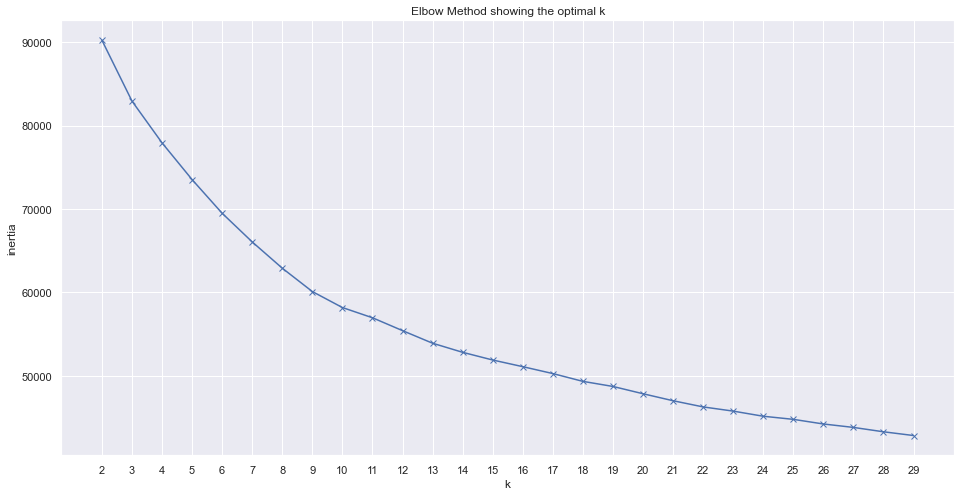

In [118]:
K = range(2, 30)
inertia = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=17)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Now we tune for silhouette

[Silhoutte score](https://en.wikipedia.org/wiki/Silhouette_(clustering)): *How similar is an observation to its own cluster compared to other clusters?*
Score ranges from 1 to -1. High value: Object matches well to own cluster, low value correspondingly.

1. For each point p, first find the average distance between p and all other points in the same cluster (this is a measure of cohesion, call it A).

2. Then find the average distance between p and all points in the nearest cluster (this is a measure of separation from the closest other cluster, call it B).

3. The silhouette coefficient for p is defined as the difference between B and A divided by the greater of the two (max(A,B)).

4. We evaluate the cluster coefficient of each point and from this we can obtain the 'overall' average cluster coefficient.

Intuitively, we are trying to measure the space between clusters. If cluster cohesion is good (A is small) and cluster separation is good (B is large), the numerator will be large, etc. 

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

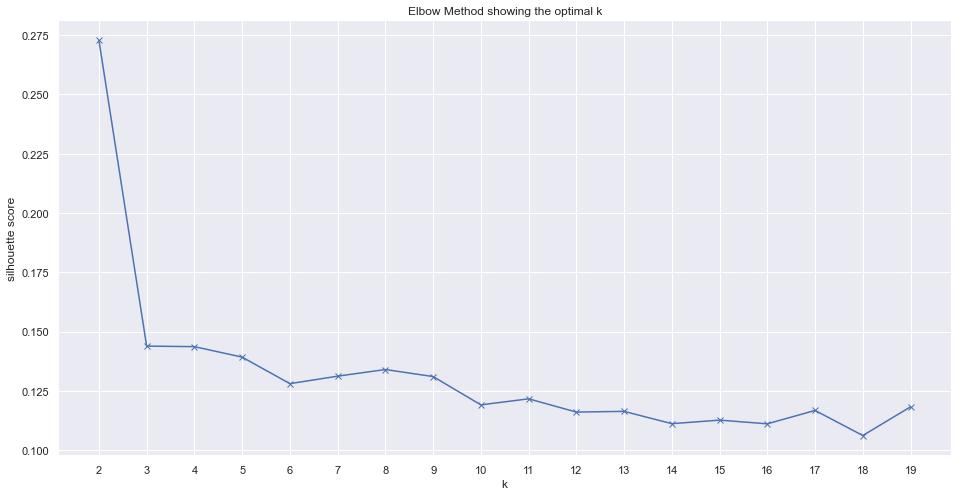

In [123]:
K = range(2, 20)
silhouette = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep,
                                       kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Something between 3 or 10 seems good

Text(0.5, 1.0, 'Elbow Method showing the optimal n_init')

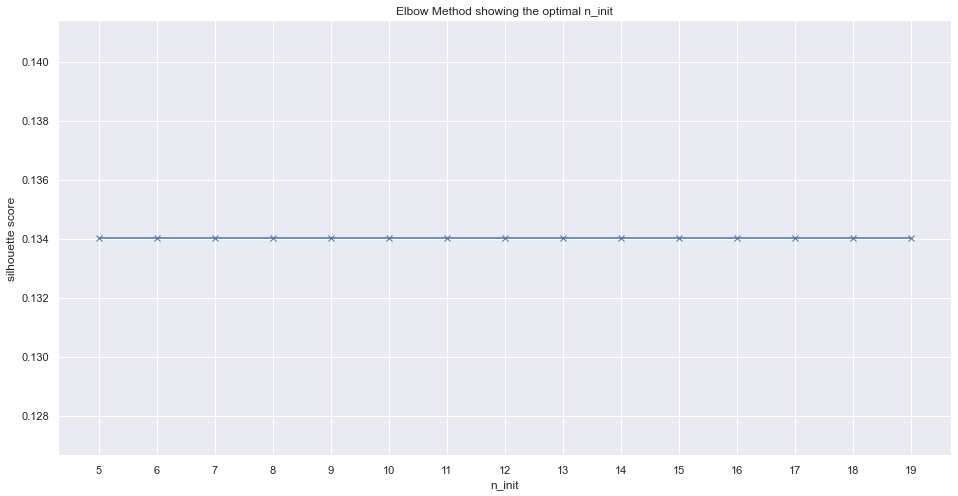

In [173]:
N_init = range(5, 20)
silhouette = []

for n in tqdm(N_init):
    kmeans = KMeans(n_clusters=8,
                    random_state=1234,
                   n_init=n)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep,
                                       kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(N_init, silhouette, 'bx-')
plt.xlabel('n_init')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(N_init), max(N_init)+1, 1.0))
plt.title('Elbow Method showing the optimal n_init')

## inspecting the clusters

In [124]:
df_songs_clustered[df_songs_clustered['cluster']==3]

,name,artists,type,id,uri,track_href,analysis_url,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
65,neon lover (Alex Midi Remix),"Valentina Moretti, Alex Midi",audio_features,1NwKc6s1K79IKD1dEcjSkT,spotify:track:1NwKc6s1K79IKD1dEcjSkT,https://api.spotify.com/v1/tracks/1NwKc6s1K79I...,https://api.spotify.com/v1/audio-analysis/1NwK...,0.591,0.6180,7.0,...,1.0,0.0660,0.00367,0.873,0.0486,0.5120,127.002,303694.0,4.0,3
30,Just the Two of Us,"Grover Washington, Jr.",audio_features,5fdNHVZHbWB1AaXk4RBGVD,spotify:track:5fdNHVZHbWB1AaXk4RBGVD,https://api.spotify.com/v1/tracks/5fdNHVZHbWB1...,https://api.spotify.com/v1/audio-analysis/5fdN...,0.743,0.4300,10.0,...,0.0,0.0906,0.44500,0.363,0.0455,0.5930,95.406,443773.0,4.0,3
21,We Could Be Friends,Freelance Whales,audio_features,5KsXBSnjCVmOVQMfMEJqL7,spotify:track:5KsXBSnjCVmOVQMfMEJqL7,https://api.spotify.com/v1/tracks/5KsXBSnjCVmO...,https://api.spotify.com/v1/audio-analysis/5KsX...,0.368,0.6950,6.0,...,1.0,0.0358,0.34300,0.907,0.1600,0.2170,77.575,253240.0,4.0,3
33,Bohemian Rhapsody - Remastered 2011,Queen,audio_features,7tFiyTwD0nx5a1eklYtX2J,spotify:track:7tFiyTwD0nx5a1eklYtX2J,https://api.spotify.com/v1/tracks/7tFiyTwD0nx5...,https://api.spotify.com/v1/audio-analysis/7tFi...,0.392,0.4020,0.0,...,0.0,0.0536,0.28800,0.000,0.2430,0.2280,143.883,354320.0,4.0,3
24,Comfortably Numb,Pink Floyd,audio_features,5HNCy40Ni5BZJFw1TKzRsC,spotify:track:5HNCy40Ni5BZJFw1TKzRsC,https://api.spotify.com/v1/tracks/5HNCy40Ni5BZ...,https://api.spotify.com/v1/audio-analysis/5HNC...,0.472,0.3660,11.0,...,0.0,0.0286,0.15000,0.308,0.0837,0.1710,127.167,382297.0,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,The Bach Suite: Allegro - Live,Oscar Peterson,audio_features,5ldYARwUUKPaiLLPSGK6cD,spotify:track:5ldYARwUUKPaiLLPSGK6cD,https://api.spotify.com/v1/tracks/5ldYARwUUKPa...,https://api.spotify.com/v1/audio-analysis/5ldY...,0.386,0.6380,2.0,...,1.0,0.0355,0.87400,0.440,0.7050,0.5020,126.600,606180.0,4.0,3
44,Concierto de Aranjuez: Adagio,Miles Davis,audio_features,5snEgy8RMnkJZqfwqD6svi,spotify:track:5snEgy8RMnkJZqfwqD6svi,https://api.spotify.com/v1/tracks/5snEgy8RMnkJ...,https://api.spotify.com/v1/audio-analysis/5snE...,0.257,0.0851,5.0,...,1.0,0.0399,0.93500,0.582,0.3490,0.0392,107.620,980507.0,4.0,3
46,"Symphony No. 5, Adagietto","Gustav Mahler, Uri Caine, Ralph Alessi, David ...",audio_features,26h34kmorsumFSyRqZ3lVc,spotify:track:26h34kmorsumFSyRqZ3lVc,https://api.spotify.com/v1/tracks/26h34kmorsum...,https://api.spotify.com/v1/audio-analysis/26h3...,0.162,0.3080,5.0,...,1.0,0.0453,0.92900,0.633,0.1060,0.0450,83.372,762840.0,4.0,3
48,2001 Also Sprach Zarathustra,Deodato,audio_features,5hXFoe8prMnikdM21Fcgl6,spotify:track:5hXFoe8prMnikdM21Fcgl6,https://api.spotify.com/v1/tracks/5hXFoe8prMni...,https://api.spotify.com/v1/audio-analysis/5hXF...,0.609,0.7230,5.0,...,1.0,0.0459,0.34500,0.684,0.1150,0.5460,101.061,543387.0,4.0,3


# Function which predicts the cluster based on a given song


In [256]:
def predict_cluster(model, song):
    """
    model: a trained sklearn kmeans model
    song: dict of artist & title, like {'artist':<artist>, 'title':<title>}
    """

def get_song_id(title):
    
    query1 = f"track:{title}"

    song_id = sp.search(q=query1, type="track", limit=1)['tracks']['items'][0]['id']
    return song_id

def get_features_from_id(id_, as_df=False):
    if as_df:
        return pd.DataFrame(sp.audio_features(id_))
    else:
        return sp.audio_features(id_)

In [257]:
get_features_from_id(get_song_id("abba"), as_df=True)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.687,0.193,9,-15.035,1,0.0364,0.685,0.434,0.109,0.142,94.989,audio_features,6VoL4G7Tt9XQXMK6B8BCfg,spotify:track:6VoL4G7Tt9XQXMK6B8BCfg,https://api.spotify.com/v1/tracks/6VoL4G7Tt9XQ...,https://api.spotify.com/v1/audio-analysis/6VoL...,222881,4


# Writing the gnod main() function

In [ ]:
# TODO


First, the necessary sub functions

In [ ]:
def is_song_hot(hot_song_database_in,
                song_in,
                artist_in,
                return_result=True):
    """
    hot_song_database: the database of the billboard top 100 as pandas dataframe
    song: the song to be checked
    """
    # Defining length of input database
    len_df = len(hot_song_database_in)
    
    # Creating database to work with (will contain lower case song titles & artists)
    hot_song_database = pd.DataFrame()
    hot_song_database['song'] = hot_song_database_in['song'].apply(lambda x: x.lower())
    hot_song_database['artist'] = hot_song_database_in['artist'].apply(lambda x: x.lower())
    song = song_in.lower()
    artist = artist_in.lower()
    
    # Checking if user input song is in database
    if song in hot_song_database['song'].values:
        # If so, create a new df with only the resulting lines
        result_song_df = hot_song_database[hot_song_database['song']==song]
        
        # check also in user input artist is in that resulting df
        if artist in result_song_df['artist'].values:
            # defining resulting line
            result_line = result_song_df[result_song_df['artist'] == artist]
            print(f"Wow! {song_in} by {artist_in} is currently hot!\n")
            
            # preparing to recommend user a random song
            randint = random.randint(0, len(df)-1)
            random_song = hot_song_database_in.iloc[randint]
            random_song_name = random_song['song']
            random_artist_name = random_song['artist']
            print(f"How about '{random_song_name}' by '{random_artist_name}'?")
    
    # song is not in database        
    else:
        print(f"Your song '{song}' is currently not hot :(")
        if recommend_another:
            print("You want me to suggest a similar one?")
            while True:
                choice = input("y/n?")
                if choice == "y":
                    return 1   # the Kmeans recommender function in main() 
                                # should check if non-None is returned here
                                # which would trigger the cluster recommender
                elif choice == "n":
                    print("Bye!")
                    return
                else:
                    continue
    

In [167]:
is_song_hot(hot_songs, "hey jude", "BTS")

Your song 'hey jude' is currently not hot :(
You want me to suggest a similar one?


KeyboardInterrupt: Interrupted by user